In [1]:
from shapleyAnalysis import *
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib import patheffects
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
sentences = pd.read_csv('clean_genes.csv')["Summary"].tolist()
genes = pd.read_csv('clean_genes.csv')["Gene name"].tolist()
idx_to_gene = {i:gene for i,gene in enumerate(genes)}
gene_to_idx = {gene:i for i,gene in enumerate(genes)}

stateDictMetadata = {'subcellular_location_2':{'labels':{0: 'Cytoplasm',1:'Nucleus',2:'Cell Membrane'},'name':'Subcellular Localization'},
                         'BivalentVsLys4_2':{'labels':{0:'Lys4Only',1:'Bivalent'},'name':'Bivalent vs. Lys4'},                         
                         'BivalentVsNonMethylated_3':{'labels':{0:'Bivalent',1:'NonMethylated'},'name':'Bivalent vs. Non-methylated'},
                         'DosageSensitivity_2':{'labels':{0: 'Dosage Insensitive',1:'Dosage Sensitive'},'name':'Dosage Sensitivity'},
                         'solubility_3':{'labels':{0: 'Membrane',1:'Soluble'},'name':'Membrane vs. Soluble'},
                         'Tf_range_0':{'labels':{0:'Short Range',1:'Long Range'},'name':'Transcription Factor Range'},
                         'phastcons_2':{'labels':{0:'Conservation'},'name':'Conservation'}}

#ONLY NECESSARY FOR CHOSEN ONES
for task in stateDictMetadata: # add label indexes
    stateDictMetadata[task]['label_indexes'] = {v: k for k, v in stateDictMetadata[task]['labels'].items()}

#GO Clusters ICLR
# clustersMetadata = {'0':{'name':'Activation of anterior HOX genes in hindbrain development during early embryogenesis'},
#                     '1':{'name':'Cell-Cell communication'},
#                     '2':{'name':'Signaling by Rho GTPases'},
#                     '3':{'name':'Extracellular matrix organization'},
#                     '4':{'name':'Metabolism of amino acids and derivatives'},
#                     '5':{'name':'Processing of Capped Intron-Containing Pre-mRNA'},
#                     '6':{'name':'Asparagine N-linked glycosylation'},
#                     '7':{'name':'Axon guidance'},
#                     '8':{'name':'Neuronal System'},
#                     '9':{'name':'Cell Cycle, Mitotic'},
#                     '10':{'name':'Cell Cycle, Mitotic'},
#                     '11':{'name':'Class I MHC mediated antigen processing & presentation'},
#                     '12':{'name':'Metabolism of carbohydrates'},
#                     '13':{'name':'Cell Cycle, Mitotic'},
#                     '14':{'name':'GPCR ligand binding'},
#                     '15':{'name':'The citric acid (TCA) cycle and respiratory electron transport'},
#                     '16':{'name':'Axon guidance'},
#                     '17':{'name':'Axon guidance'},
#                     '18':{'name':'HIV Infection'},
#                     '19':{'name':'Signaling by Interleukins'},
#                     '20':{'name':'Keratinization'},
#                     '21':{'name':'GPCR ligand binding'},
#                     '22':{'name':'Translation'}}
# for i in range(23): clustersMetadata[str(i)]['labels']={0: 'Membrane',1:'Soluble'}
    
# GeneLLM Clusters
# clustersMetadata = {'0':{'name':'Asparagine N-linked glycosylation'},
#                     '1':{'name':'Infectious disease'},
#                     '2':{'name':'Metabolism of amino acids and derivatives'},
#                     '3':{'name':'GPCR ligand binding'},
#                     '4':{'name':'GPCR ligand binding'},
#                     '5':{'name':'Circadian Clock'},
#                     '6':{'name':'Signaling by Rho GTPases'},
#                     '7':{'name':'Cell Cycle'},
#                     '8':{'name':'Cell Cycle'},
#                     '9':{'name':'Signaling by Receptor Tyrosine Kinases'},
#                     '10':{'name':'Class I MHC mediated antigen processing & presentation'},
#                     '11':{'name':'SLC-mediated transmembrane transport'},
#                     '12':{'name':'Neuronal System'},
#                     '13':{'name':'Cell Cycle'},
#                     '14':{'name':'Signaling by Interleukins'},
#                     '15':{'name':'Cell Cycle, Mitotic'},
#                     '16':{'name':'Ion channel transport'},
#                     '17':{'name':'Translation'}}
# for i in range(18): clustersMetadata[str(i)]['labels']={0: 'Membrane',1:'Soluble'}

# Solubility NEW Clusters
# clustersMetadataNEW = {'0':{'name':'Class I MHC mdeiated antigen processing & presentation'},
#                     '1':{'name':'Cell Cycle'},
#                     '2':{'name':'Asparagine N-linked glycosylation'},
#                     '3':{'name':'Metabolism of amino acids and derivatives'},
#                     '4':{'name':'GPCR ligand binding'},
#                     '5':{'name':'GPCR ligand binding'},
#                     '6':{'name':'Cell Cycle'},
#                     '7':{'name':'Ion channel transport'},
#                     '8':{'name':'Circadian Clock'},
#                     '9':{'name':'Phospholipid metabolism'},
#                     '10':{'name':'Neuronal System'},
#                     '11':{'name':'Axon guidance'}}
# for i in range(12): clustersMetadataNEW[str(i)]['labels']={0: 'Membrane',1:'Soluble'}

clustersMetadataNEW2 = {
    '0': {'name': 'Signaling by Rho GTPases'},
    '1': {'name': 'Activation of BH3-only proteins'},
    '2': {'name': 'Clathrin-mediated endocytosis'},
    '3': {'name': 'Regulation of beta-cell development'},
    '4': {'name': 'Metabolism of amino acids and derivatives'},
    '5': {'name': 'Asparagine N-linked glycosylation'},
    '6': {'name': 'Cell Cycle'},
    '7': {'name': 'Neutrophil degranulation'},
    '8': {'name': 'Class I MHC mediated antigen processing & presentation'},
    '9': {'name': 'Cell junction organization'},
    '10': {'name': 'Processing of Capped Intron-Containing Pre-mRNA'},
    '12': {'name': 'Toll-like Receptor Cascades'},
    '13': {'name': 'Signaling by Rho GTPases'},
    '14': {'name': 'Immunoregulatory interactions between a Lymphoid and a non-Lymphoid cell'},
    '15': {'name': 'Signaling by Interleukins'},
    '16': {'name': 'GPCR ligand binding'},
    '17': {'name': 'Collagen formation'},
    '18': {'name': 'Cell Cycle'},
    '19': {'name': 'SLC-mediated transmembrane transport'},
    '20': {'name': 'Phospholipid metabolism'},
    '21': {'name': 'Axon guidance'},
    '22': {'name': 'Extracellular matrix organization'},
    '23': {'name': 'Cell Cycle'},
    '24': {'name': 'Unfolded Protein Response (UPR)'},
    '25': {'name': 'Neuronal System'},
    '26': {'name': 'Immunoregulatory interactions between a Lymphoid and a non-Lymphoid cell'},
    '27': {'name': 'Glutathione conjugation'},
    '28': {'name': 'Immunoregulatory interactions between a Lymphoid and a non-Lymphoid cell'},
    '29': {'name': 'Biological oxidations'},
    '30': {'name': 'The citric acid (TCA) cycle and respiratory electron transport'},
    '31': {'name': 'Infectious disease'},
    '32': {'name': 'Asparagine N-linked glycosylation'},
    '33': {'name': 'Transcriptional regulation of pluripotent stem cells'},
    '35': {'name': 'Interferon Signaling'},
    '36': {'name': 'Class I MHC mediated antigen processing & presentation'},
    '37': {'name': 'mRNA decay by 3\' to 5\' exoribonuclease'},
    '38': {'name': 'Chromatin modifying enzymes'},
    '39': {'name': 'Inhibition of the proteolytic activity of APC/C required for the onset of anaphase by mitotic spindle checkpoint components'},
    '40': {'name': 'Cell Cycle'},
    '41': {'name': 'Translation'},
    '42': {'name': 'Translation'},
    '43': {'name': 'Signaling by Receptor Tyrosine Kinases'},
    '44': {'name': 'The citric acid (TCA) cycle and respiratory electron transport'},
    '45': {'name': 'Class I MHC mediated antigen processing & presentation'}
}
for i in clustersMetadataNEW2.keys(): clustersMetadataNEW2[str(i)]['labels']={0: 'Membrane',1:'Soluble'}


chosenOnes_tasks = {'subcellular_location_2':{'Cytoplasm': ['cytoplasm', 'microtubulebinding', 'cytosol'],'Nucleus': ['nucleic', 'nucleoplasm', 'nucleus'],'Cell Membrane': ['transmembrane', 'membranespanning', 'membraneassociated']},
                    'BivalentVsLys4_2':{'Lys4Only': ['dnatemplated','nucleoplasm','serinethreonine'],'Bivalent': ['homeoboxcontaining', 'embryogenesis', 'neurogenesis']},
                    'BivalentVsNonMethylated_3':{'Bivalent': ['homeobox', 'transcriptional', 'cisregulatory'],'NonMethylated': ['ubiquitindependent', 'cyclindependent', 'calciumdependent']},
                    'DosageSensitivity_2':{'Dosage Insensitive': ['ubiquitindependent', 'cisregulatory', 'sequencespecific'],'Dosage Sensitive': ['tgfbeta', 'gpcr', 'hoxa9']},
                    'solubility_3':{'Membrane': ['transmembrane', 'integral', 'membraneanchored'],'Soluble': ['cytosol', 'nucleoplasm', 'cytoplasm']},
                    'Tf_range_0':{'Short Range': ['dnabinding', 'cisregulatory', 'dnatemplated'],'Long Range': ['hedgehogshh', 'nfkappab', 'stat3']},
                    'phastcons_2':{'Conservation': ['collagen', 'spliceosome', 'rnabinding']}}

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dandreas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def flattenWord(word):
    chars_to_remove = string.punctuation
    table = str.maketrans('', '', chars_to_remove)
    return word.lower().strip().translate(table)

def getOriginalWord(sentences, index, flatword):
    originalWords = sentences[index].split()
    fixRightParen = lambda x: x+')' if word.count('(') > word.count(')') else x
    fixLeftParen = lambda x: '('+x if word.count('(') < word.count(')') else x
    fixParens = lambda x: fixLeftParen(fixRightParen(x))
    for word in originalWords:
        flattenedOriginalWord = flattenWord(word)
        if flatword == flattenedOriginalWord:
            word = word.strip(string.punctuation)
            return fixParens(word)
        if flatword+'s' == flattenedOriginalWord:
            word = word[:-1].strip(string.punctuation)
            return fixParens(word)

In [7]:
# get analysis from the chosen words of each task
analyses = pickleLoad('data/SHAPAnalysis/analyses_10_tasks.pkl')

chosen_analyses = {}
for task, chosenOnes in chosenOnes_tasks.items():
    chosen_analyses[task] = {}
    for label,chosen_words in chosenOnes.items():
        labels = stateDictMetadata[task]['label_indexes']
        nlabel = labels[label]
        n_classes = len(labels)
        data_keys = 'collapsed_word_sum_sorted_90_percentile_vals', 'collapsed_word_sum_sorted_90_percentile_keys', 'collapsed_word_sum_sorted_90_percentile_log_counts', 'collapsed_word_sum_sorted_90_percentile_indexes'
        keys = analyses[task][data_keys[1]][nlabel]
        indexes = [keys.index(word) for word in chosen_words]        
        for data_key in data_keys: 
            if chosen_analyses[task].get(data_key) is None: chosen_analyses[task][data_key] = [[] for i in range(n_classes)]
            chosen_analyses[task][data_key][nlabel]=[analyses[task][data_key][nlabel][i] for i in indexes]

loading data from data/SHAPAnalysis/analyses_10_tasks.pkl


In [3]:
# def getOriginalWord(sentences, index, flatword):

def lazyRun(savedir,savename,f,params, save=True):
    x=pickleLoad(savedir+savename+'.pkl')
    if x is False:
        x=f(params)
        if save: pickleSave(x,savedir,savename+'.pkl')
    return x

def paramsToString(params):
    x=[]
    for i,j in params.items():
        if type(j)==int: x.append(f'{i}_{j}')
        elif type(j) == set: x.append(f'{i}_{len(j)}')
        elif type(j) == str: x.append(j)
        elif type(j) == bool: x.append(f'{i}_{j}')
    return '_'.join(x)

def analyzeTasks(collapse_params,percentile):
    dataset = 'clean_genes'
    analyses = {}
    kind = collapse_params['kind']

    for state_dict in stateDictMetadata.keys():
        print('\n',state_dict,'\n')
        
        shap_values = pickleLoad(f'data/SHAPValues/{dataset}_{state_dict}.pkl')

        savedir = f'data/SHAPAnalysis/tasks/base/{dataset}_{state_dict}/'
        savename=f'grouped_words_and_tokens'
        params = {'shap_values':shap_values}
        analysis = lazyRun(savedir,savename,getSHAPAnalysis,params)

        savedir_collapsed = f'data/SHAPAnalysis/tasks/collapsed/{dataset}_{state_dict}/'
        savename_collapsed = paramsToString(collapse_params)
        collapse_params['analysis'] = analysis
        collapsed_analysis = lazyRun(savedir_collapsed,savename_collapsed,getCollpasedAnalysis,collapse_params)

        savedir_percentile = f'data/SHAPAnalysis/tasks/percentile/{dataset}_{state_dict}/{savename_collapsed}/'
        savename_percentile = f'collapsed_{kind}_{percentile}_percentile_analysis'
        params = {'analysis':collapsed_analysis,'percentile':percentile,'kind':f'collapsed_{kind}'}
        percentile_analysis = lazyRun(savedir_percentile,savename_percentile,getPercentileAnalysis,params)
        analyses[f'{state_dict}'] = percentile_analysis
    print('\n---------------------\n')
    return analyses
    
def analyzeClusters(collapse_params,percentile):
    analyses = {}
    kind = collapse_params['kind']
    for i in range(19):
        print('\nCLUSTER',i,'\n')

        shap_values = pickleLoad(f'data/SHAPValues/solubility_enrichment_analysis1/cluster{i}.pkl')

        savedir = f'data/SHAPAnalysis/clusters/base/cluster{i}/'
        savename=f'grouped_word_and_tokens'
        params={'shap_values':shap_values}
        analysis = lazyRun(savedir,savename,getSHAPAnalysis,params)

        savedir = f'data/SHAPAnalysis/clusters/collapsed/cluster{i}/'
        savename_collapsed = paramsToString(collapse_params)
        collapse_params['analysis'] = analysis
        collapsed_analysis = lazyRun(savedir,savename_collapsed,getCollpasedAnalysis,collapse_params)

        savedir = f'data/SHAPAnalysis/clusters/percentile/cluster{i}/{savename_collapsed}/'
        savename = f'collapsed_{kind}_{percentile}_percentile_analysis'
        params = {'analysis':collapsed_analysis,'percentile':percentile,'kind':f'collapsed_{kind}'}
        percentile_analysis = lazyRun(savedir,savename,getPercentileAnalysis,params)
        analyses[f'{i}'] = percentile_analysis
        print('\n---------------------\n')
    return analyses
            

In [5]:
# # default values, uncomment to change and pass as keyword argument to generatePlots()
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':10,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# analyses_10_tasks = analyzeTasks(collapse_params,percentile)
# pickleSave(analyses_10_tasks,'data/SHAPAnalysis/','analyses_10_tasks.pkl')


In [ ]:
# # default values, uncomment to change and pass as keyword argument to generatePlots()
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':100,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# analyses_100_tasks = analyzeTasks(collapse_params,percentile)
# pickleSave(analyses_100_tasks,'data/SHAPAnalysis/','analyses_100_tasks.pkl')


In [ ]:
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':10,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# analyses_10_clusters = analyzeClusters(collapse_params,percentile)
# pickleSave(analyses_10_clusters,'data/SHAPAnalysis/','analyses_10_clusters.pkl')

In [ ]:
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':100,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# analyses_100_clusters = analyzeClusters(collapse_params,percentile)
# pickleSave(analyses_100_clusters,'data/SHAPAnalysis/','analyses_100_clusters.pkl')

In [4]:
# {'analysis_key': data ... }
def get_analysis_data(analysis, percentile, kind):
    data = {
        'all_top_vals': analysis[f'collapsed_{kind}_sorted_{percentile}_percentile_vals'],
        'all_top_keys': analysis[f'collapsed_{kind}_sorted_{percentile}_percentile_keys'],
        'all_log_counts': analysis[f'collapsed_{kind}_sorted_{percentile}_percentile_log_counts'],
        'indexes': analysis[f'collapsed_{kind}_sorted_{percentile}_percentile_indexes'],
    }
    return data


def getGlobalMaxVal(dataType,analyses,percentile,kind,nToPlot):
    global_max_val=0
    for a in analyses.keys():
        analysis = analyses[a]
        data = get_analysis_data(analysis, percentile, kind)
        for x in data[dataType]:
            global_max_val = max(global_max_val,max(x[:nToPlot]))
    return global_max_val

def generateBarPlot_allClasses(analyses, kind, analyses_metadata, makeLegend=False, labelType = None, plotTitle=None,figuresize = (20,5),nToPlot = 1, percentile=90, saveDir=None, saveName=None, saveType='.pdf',legendOutside=True, clusterIndexes=None, sentences = sentences):
    assert labelType in ['classNames','analysisName',None]
    all_x_positions = []
    all_x_labels = []

    fig, ax1 = plt.subplots(figsize=figuresize)
    if ('phastcons_2' in analyses) and (len(analyses)>1): ax2=ax1.twinx()
    # plt.figure(figsize=figuresize)
    ax1.set_ylabel('Characteristic SHAP Value')
    if len(analyses)>1:
        ax1.set_ylabel('SHAP Value [Classification Tasks]')
    ax1.grid(axis='y')
    if ('phastcons_2' in analyses) and (len(analyses)>1):
        phastconsData = get_analysis_data(analyses['phastcons_2'], percentile, kind)
        maxPhastcons = max(phastconsData['all_top_vals'][0][:nToPlot])
        ax2.set_ylim(0,maxPhastcons*1.35)  
        ax2.set_ylabel('SHAP Value [Conservation Only]')
    if plotTitle is not None: plt.title(plotTitle)

    global_max_log_count = getGlobalMaxVal('all_log_counts',analyses,percentile,kind,nToPlot)
    global_max_val = getGlobalMaxVal('all_top_vals',analyses,percentile,kind,nToPlot)
    ax1.set_ylim(0,global_max_val*1.35)

    for na,analysis_name in enumerate(list(analyses.keys())):
        analysis = analyses[analysis_name]
        class_names=analyses_metadata[analysis_name]['labels']
        data = get_analysis_data(analysis, percentile, kind)
        num_classes = len(data['all_top_vals'])

        spacing = .1         # Spacing between bars, as a fraction of total bar width
        bar_width = 1 / num_classes * (1 - spacing)  # Adjust bar width

        # Initialize lists to store x-tick positions and labels

        colors_ = ['darkgreen','darkblue','darkred']

        for classIndex in range(num_classes):
            color_ = colors_[classIndex]
            top_vals=data['all_top_vals'][classIndex][:nToPlot]
            top_keys=data['all_top_keys'][classIndex][:nToPlot]
            indexes = data['indexes'][classIndex][:nToPlot]
            if clusterIndexes is not None:
                indexes = [clusterIndexes[i] for i in indexes]
            top_keys_original = [getOriginalWord(sentences,indexes[nkey],key) for nkey,key in enumerate(top_keys)]
            for nz,z in enumerate(top_keys_original):
                if z is None: 
                    print(top_keys[nz],':',sentences[indexes[nz]])
                    assert False
            log_counts=data['all_log_counts'][classIndex][:nToPlot]
            a_offset = na * (1 + spacing)*(len(top_keys)+1) # Add an offset for each 'a'
            offset = (classIndex - num_classes / 2) * bar_width + classIndex * bar_width * spacing
            x_positions = np.arange(nToPlot) * (1 + spacing) + offset + a_offset

            if labelType == 'classNames':
                label = class_names[classIndex] if class_names is not None else f'Class {classIndex}'
            elif labelType == 'analysisName':
                label = analysis_name

            for i in range(len(top_keys)):
                normalized_log_count = (log_counts[i]) / (global_max_log_count) 
                bar_color = mcolors.to_rgba(color_, alpha=normalized_log_count)
                if (analysis_name == 'phastcons_2') and (len(analyses)>1): 
                    ax2.bar(x_positions[i], top_vals[i], bar_width, color=bar_color, edgecolor=color_)
                else:
                    ax1.bar(x_positions[i], top_vals[i], bar_width, color=bar_color, edgecolor=color_)
                if normalized_log_count == 1:
                    ax1.text(x_positions[i], top_vals[i]*1.05, f'{global_max_log_count:.1f}', fontsize=10, ha='center')

            if classIndex:
                to_output.append(list(top_keys_original[:10]))
                to_output.append(list(top_vals[:10]))
                to_output.append(list(indexes[:10]))
            else:
                to_output=[list(top_keys_original[:10]), list(top_vals[:10]), list(map(lambda x: int(10**x),list(log_counts[:10])))]
            # print(to_output)
                
            # Append the x-positions and labels for this class
            all_x_positions.extend(x_positions)
            all_x_labels.extend(top_keys_original)

            if labelType is not None:
                idx = int(len(x_positions)/2)
                if labelType=='classNames':
                    ax1.text(x_positions[idx]-offset, global_max_val*1.25-classIndex*.15, label, color=color_, fontsize=12, ha='center')          
        if labelType=='analysisName':
            ax1.text(x_positions[idx]-offset, global_max_val*1.25, label, color='black', fontsize=12, ha='center')

    ax1.set_xticks(all_x_positions)
    ax1.set_xticklabels(all_x_labels, rotation=60, ha='right', va='center', rotation_mode='anchor')

    # Create custom legend
    if makeLegend:
        legend_handles = []
        for classIndex in range(num_classes):
            color_ = colors_[classIndex]
            label = class_names[classIndex] if class_names is not None else f'Class {classIndex}'

            # Create a patch for maximum log count (full opacity)
            # handle_max = mpatches.Patch(color=color_, label=f'{label} ({topLogCount:.1f})', alpha=1.0)
            handle_max = mpatches.Patch(color=color_, label=f'{label}', alpha=1.0)
            legend_handles.append(handle_max)

        if legendOutside:
            plt.legend(handles=legend_handles, title = f'Max Log Count ({global_max_log_count:.1f})',bbox_to_anchor=[1,1],loc='upper left')
        else:
            plt.legend(handles=legend_handles, title = f'Max Log Count ({global_max_log_count:.1f})',loc='upper right')

    if saveName is not None: 
        assert saveDir[-1]=='/', 'saveDir must end with /'
        ensureDirectoryExists(saveDir)
        plt.tight_layout()
        plt.savefig(saveDir+saveName+saveType,bbox_inches='tight',dpi=600)
        plt.close()
    else: plt.show()

    return to_output

### Tasks Supplementary Figures, 10 and 100 minOccurences

In [ ]:
# metadata = stateDictMetadata
# for i in [10,100]:
#     analyses = pickleLoad(f'data/SHAPAnalysis/analyses_{i}_tasks.pkl')
#     for state_dict in stateDictMetadata.keys(): 
#         print(state_dict) 
#         analysis = {state_dict: analyses[state_dict]}
#         name = stateDictMetadata[state_dict]['name']
#         title = f'{name}, Word Sum, {i} Min Occurences'
#         savedir_ = 'data/figures/suppFigs/tasks/wordSumAnalysis/'
#         savename_= f'{state_dict}_word_sum_{i}'
#         generateBarPlot_allClasses(analysis,
#                             'word_sum',
#                             metadata,
#                             plotTitle=title,
#                             makeLegend=True,
#                             labelType='analysisName',
#                             nToPlot=25, 
#                             figuresize=(20,5),
#                             saveName=savename_,
#                             saveDir=savedir_,
#                             printIndexes=True)
        

### Solubility Bar Plot

In [ ]:
metadata = stateDictMetadata
analyses = pickleLoad('data/SHAPAnalysis/analyses_10_tasks.pkl')
state_dict = 'solubility_3'
analysis = {state_dict: analyses[state_dict]}
print(analyses[state_dict].keys())
name = stateDictMetadata[state_dict]['name']
savedir_ = 'data/figures/'
savename_= 'solubility_bar_plot'
# generateBarPlot_allClasses(analysis,
#                     'word_sum',
#                     metadata,
#                     makeLegend=True,
#                     labelType=None,
#                     nToPlot=25, 
#                     figuresize=(20,5),
#                     saveName=savename_,
#                     saveDir=savedir_,
#                     saveType='.png',
#                     legendOutside=False)

# Solubility GO ICLR

In [4]:
def analyzeTask(shap_values,collapse_params,percentile,savedir):
    kind = collapse_params['kind']

    savename=f'grouped_words_and_tokens'
    params = {'shap_values':shap_values}
    analysis = lazyRun(savedir,savename,getSHAPAnalysis,params)

    savename_collapsed = paramsToString(collapse_params)
    collapse_params['analysis'] = analysis
    collapsed_analysis = lazyRun(savedir,savename_collapsed,getCollpasedAnalysis,collapse_params)

    savename_percentile = f'collapsed_{kind}_{percentile}_percentile_analysis'
    params = {'analysis':collapsed_analysis,'percentile':percentile,'kind':f'collapsed_{kind}'}
    percentile_analysis = lazyRun(savedir,savename_percentile,getPercentileAnalysis,params)
    
    return percentile_analysis

loading data from solubilityGO/analysis_solubilityGO.pkl


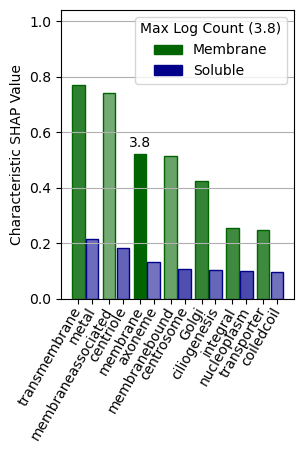

[['transmembrane',
  'membraneassociated',
  'membrane',
  'membranebound',
  'Golgi',
  'integral',
  'transporter'],
 [0.7709175685886294,
  0.7403029677264082,
  0.5206986585108098,
  0.5142252702335828,
  0.4248413997842001,
  0.2544971243478358,
  0.24576210434800788],
 [13536, 12629, 2332, 13860, 14396, 13468, 10041],
 ['metal',
  'centriole',
  'axoneme',
  'centrosome',
  'ciliogenesis',
  'nucleoplasm',
  'coiledcoil'],
 [0.21371694540139297,
  0.18049556835298597,
  0.1300196713209152,
  0.10598567312805576,
  0.10348912474268776,
  0.1002170088228032,
  0.09484487283345941],
 [3867, 7782, 12917, 13712, 13695, 7800, 11428]]

In [13]:
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':100,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# shap_values = pickleLoad('solubilityGO/clean_genes_solubilityNEW.pkl')
# savedir = 'solubilityGO/'
# analysis_solubilityGO = analyzeTask(shap_values,collapse_params,percentile,savedir)
# pickleSave(analysis_solubilityGO,'solubilityGO/','analysis_solubilityGO.pkl')

metadata = stateDictMetadata
state_dict = 'solubility_3'
savedir_ = 'solubilityGO/'
savename_= 'solubilityGO_bar_plot_100minOccurences'
analysis_solubilityGO = pickleLoad('solubilityGO/analysis_solubilityGO.pkl')
analysis = {state_dict: analysis_solubilityGO}
generateBarPlot_allClasses(analysis,
                    'word_sum',
                    metadata,
                    makeLegend=True,
                    labelType=None,
                    nToPlot=7, 
                    figuresize=(3,3.75),
                    saveName=savename_,
                    saveDir=savedir_,
                    saveType='.pdf',
                    legendOutside=False)


### Cluster Supplementary Figures, 10 and 100 minOccurences

In [33]:
# def analyzeClustersGO(collapse_params,percentile,nClusters):
#     analyses = {}
#     kind = collapse_params['kind']
#     for i in range(nClusters):
#         print('\nCLUSTER',i,'\n')

#         shap_values = pickleLoad(f'solubilityGO/shapValues_clusters/cluster{i}.pkl')

#         savedir = f'solubilityGO/SHAPAnalysis/clusters/base/cluster{i}/'
#         savename=f'grouped_word_and_tokens'
#         params={'shap_values':shap_values}
#         analysis = lazyRun(savedir,savename,getSHAPAnalysis,params)

#         savedir = f'solubilityGO/SHAPAnalysis/clusters/collapsed/cluster{i}/'
#         savename_collapsed = paramsToString(collapse_params)
#         collapse_params['analysis'] = analysis
#         collapsed_analysis = lazyRun(savedir,savename_collapsed,getCollpasedAnalysis,collapse_params)

#         savedir = f'solubilityGO/SHAPAnalysis/clusters/percentile/cluster{i}/{savename_collapsed}/'
#         savename = f'collapsed_{kind}_{percentile}_percentile_analysis'
#         params = {'analysis':collapsed_analysis,'percentile':percentile,'kind':f'collapsed_{kind}'}
#         percentile_analysis = lazyRun(savedir,savename,getPercentileAnalysis,params)
#         analyses[f'{i}'] = percentile_analysis
#         print('\n---------------------\n')
#     return analyses

# ## SOLUBILITY GO
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':10,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# nClusters = 23
# analyses_GO_clusters = analyzeClustersGO(collapse_params,percentile,nClusters)
# pickleSave(analyses_GO_clusters,'solubilityGO/','analyses_clusters_10minOccurences.pkl')

analyses = pickleLoad('solubilityGO/analyses_clusters_10minOccurences.pkl')
metadata = clustersMetadata
top10 ={}
for state_dict in metadata.keys(): 
    print(state_dict) 
    analysis = {str(state_dict): analyses[str(state_dict)]}
    clusterIndexes = pickleLoad(f'solubilityGO/shapValues_clusters/cluster{state_dict}_indexes.pkl')
    name = metadata[str(state_dict)]['name']
    title = f'{name}, Word Sum'
    savedir_ = 'solubilityGO/clustersFigures/'
    savename_= f'{state_dict}_word_sum_clusters_10minOccurences'
    top = generateBarPlot_allClasses(analysis,
                        'word_sum',
                        metadata,
                        plotTitle=title,
                        makeLegend=False,
                        labelType='analysisName',
                        nToPlot=25, 
                        figuresize=(20,5),
                        saveName=savename_,
                        saveDir=savedir_,
                        clusterIndexes=clusterIndexes)
    # print(top10)
    top10[f'{state_dict}: {name}']= top[0],list(map(lambda x: f'{x:.2f}',top[1])),list(map(lambda x: f'{x}',top[2])),top[3],list(map(lambda x: f'{x:.2f}',top[4])),list(map(lambda x: f'{x}',top[5]))

top10
    

loading data from solubilityGO/analyses_clusters_10minOccurences.pkl
0
loading data from solubilityGO/shapValues_clusters/cluster0_indexes.pkl
1
loading data from solubilityGO/shapValues_clusters/cluster1_indexes.pkl
2
loading data from solubilityGO/shapValues_clusters/cluster2_indexes.pkl
3
loading data from solubilityGO/shapValues_clusters/cluster3_indexes.pkl
4
loading data from solubilityGO/shapValues_clusters/cluster4_indexes.pkl
5
loading data from solubilityGO/shapValues_clusters/cluster5_indexes.pkl
6
loading data from solubilityGO/shapValues_clusters/cluster6_indexes.pkl
7
loading data from solubilityGO/shapValues_clusters/cluster7_indexes.pkl
8
loading data from solubilityGO/shapValues_clusters/cluster8_indexes.pkl
9
loading data from solubilityGO/shapValues_clusters/cluster9_indexes.pkl
10
loading data from solubilityGO/shapValues_clusters/cluster10_indexes.pkl
11
loading data from solubilityGO/shapValues_clusters/cluster11_indexes.pkl
12
loading data from solubilityGO/shapV

{'0: Activation of anterior HOX genes in hindbrain development during early embryogenesis': (['ion',
   'transporter',
   'membrane',
   'transport',
   'metals',
   'mitochondrial',
   'imprinted',
   'antigen',
   'doublestranded',
   'cisregulatory'],
  ['0.46',
   '0.30',
   '0.26',
   '0.14',
   '0.14',
   '0.13',
   '0.12',
   '0.11',
   '0.10',
   '0.09'],
  ['2976',
   '13139',
   '13037',
   '2914',
   '12029',
   '11725',
   '13575',
   '3379',
   '12971',
   '12713'],
  ['metals',
   'coiledcoil',
   'cysteinerich',
   'zincfinger',
   'nucleoplasm',
   'telomerase',
   'tolllike',
   'zincbinding',
   'nucleic',
   'zinc'],
  ['0.35',
   '0.18',
   '0.12',
   '0.12',
   '0.11',
   '0.11',
   '0.10',
   '0.09',
   '0.09',
   '0.08'],
  ['12029',
   '11748',
   '13451',
   '12650',
   '13281',
   '13118',
   '11092',
   '10660',
   '12204',
   '12967']),
 '1: Cell-Cell communication': (['membrane',
   'transmembrane',
   'membraneassociated',
   'membranespanning',
   'tetras

In [31]:
def print_aligned_columns(*lists):
    num_lists = len(lists)
    if not all(len(lists[0]) == len(lst) for lst in lists):
        raise ValueError("All lists must have the same length")

    max_lengths = [0] * num_lists
    for i in range(len(lists[0])):
        for j in range(num_lists):
            max_lengths[j] = max(max_lengths[j], len(lists[j][i]))

    # Print header
    for j in range(num_lists):
        if j % 3 == 0:
            print("membrane" if j < num_lists // 2 else "              soluble", end=" ")
        print(" " * (max_lengths[j] - len("soluble") + 1), end="")
        if j % 3 == 2:
            print("\t", end="")
    print('\n')

    # Print aligned columns
    for i in range(len(lists[0])):
        row = []
        for j in range(num_lists):
            row.append(lists[j][i] + " " * (max_lengths[j] - len(lists[j][i]) + 1))
            if j % 3 == 2:
                row[-1] += "        "
        print(" ".join(row))

for key,vals in top10.items():
    print(key)
    print_aligned_columns(vals[0],vals[1],vals[2],vals[3],vals[4],vals[5])
    print('\n\n')

NameError: name 'top10' is not defined

In [ ]:
for i in [366, 4282, 9182, 10813, 13956]:
    print(idx_to_gene[i])
    print(sentences[i])
    print('')

In [ ]:
# for i in [10,100]:
#     analyses = pickleLoad(f'data/SHAPAnalysis/analyses_{i}_clusters.pkl')
#     metadata = clustersMetadata
#     for state_dict in metadata.keys(): 
#         print(state_dict) 
#         analysis = {str(state_dict): analyses[str(state_dict)]}
#         name = metadata[str(state_dict)]['name']
#         title = f'{name}, Word Sum, {i} Min Occurences'
#         savedir_ = 'data/figures/suppFigs/solubility_clusters/wordSumAnalysis/'
#         savename_= f'{state_dict}_word_sum_{i}_clusters'
#         generateBarPlot_allClasses(analysis,
#                             'word_sum',
#                             metadata,
#                             plotTitle=title,
#                             makeLegend=False,
#                             labelType='analysisName',
#                             nToPlot=25, 
#                             figuresize=(20,5),
#                             # saveName=savename_,
#                             saveDir=savedir_)
        

### Composite Tasks Plot

In [22]:
analyses = chosen_analyses
savedir_ = 'data/figures/'
savename_= 'tasksCompositeBarPlot'
metadata = stateDictMetadata
generateBarPlot_allClasses(analyses,
                    'word_sum',
                    metadata,
                    makeLegend=False,
                    labelType='classNames',
                    nToPlot=3, 
                    figuresize=(20,5),
                    saveName=savename_,
                    saveDir=savedir_,
                    saveType='.pdf')

[['collagen', 'spliceosome', 'RNAbinding'],
 [0.007604999580785577, 0.009355973489582555, 0.00808081722029494],
 [348, 346, 223]]

In [ ]:
# #finding examples with multiple instances of 'membrane'

# shap_values = pickleLoad('data/SHAPValues/clean_genes_solubility_3.pkl')

# s = []
# for ni,i in enumerate(sentences):
#     if i.count('membrane')>1: s.append(ni)

# sorted_s = sorted([(i,sentences[i]) for i in s],key = lambda x: len(x[1]))

# for i in range(70,80):
    # print(sorted_s[i][0],sorted_s[i][1])
    # shap.plots.text(shap_values[sorted_s[i][0]])
    # print('-------------------')

In [27]:
def find_coalitions(values):
    coalitions = []
    start = 0
    for i in range(1, len(values)):
        if values[i] != values[i - 1]:
            coalitions.append((start, i - 1))
            start = i
    coalitions.append((start, len(values) - 1))
    return coalitions

softmax_percent = lambda x: 100 * np.exp(x) / np.sum(np.exp(x), axis=0)

def visualize_sentence(sentences, idx, shap_values, classIdx, saveName=None,saveDir=None,saveType=None, state_dict=None, metadata=None):
    shap_example = shap_values[idx]
    tokens = shap_example.data
    values = [i[classIdx] for i in shap_example.values]

    model_output = np.sum(shap_example.values, axis = 0)
    labels = metadata[state_dict]['labels']
    model_output_string = []
    for c,i in enumerate(model_output):
        model_output_string.append(f'{labels[c]}: {i:.2f} ({softmax_percent(model_output)[c]:.1f}%)')
    model_output_string = ', '.join(model_output_string)
    print(model_output_string)

    sentence = sentences[idx]
    gene = idx_to_gene[idx]
    coalitions = find_coalitions(values)
    y = np.array(values)
    x = np.arange(len(tokens))

    # Split the sentence into two parts
    split_index = len(tokens) // 2
    tokens1, tokens2 = tokens[:split_index], tokens[split_index:]
    values1, values2 = values[:split_index], values[split_index:]
    coalitions1, coalitions2 = find_coalitions(values1), find_coalitions(values2)

    abs_ = lambda x: [abs(i) for i in x]
    
    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5), gridspec_kw={'height_ratios': [max(abs_(values1)), max(abs_(values2))]})
    ax1.set_ylabel(f'SHAP Value ({labels[classIdx]})')
    ax1.yaxis.set_label_position('right')

    # Adjust the height of the lower plot
    ax2.set_ylim(-0.1, max(abs_(values2)) * 1.1)

    # Remove the title and border around the plot
    vals = [abs_(i) for i in (values1,values2)]
    for na,ax in enumerate([ax1, ax2]):
        ax.set_xticks([])
        ax.yaxis.tick_right()
        ax.set_yticks([max(vals[na])])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    # print the gene and sentence at the top left
    half = int(len(sentence.split(' '))/2)
    sentence1, sentence2 = ' '.join(sentence.split(' ')[:half]), ' '.join(sentence.split(' ')[half:])
    ax1.text(0,.7,gene, weight='bold')
    ax1.text(0,.6,r'$\bf{Model Output:}$ '+model_output_string)
    ax1.text(0,.5,sentence1)
    ax1.text(0,.42,sentence2)


    # Plot the two parts of the sentence
    for ax, tokens, values, coalitions in [(ax1, tokens1, values1, coalitions1), (ax2, tokens2, values2, coalitions2)]:
        bar_widths = [len(token) for token in tokens]
        total_width = sum(bar_widths) + len(tokens) - 1
        ax.set_xlim(0, total_width)
        colors = ['darkgreen','mediumseagreen','darkblue','cornflowerblue','darkred','chocolate']

        current_x = 0
        word_start = True
        for i, (start, end) in enumerate(coalitions):
            coalition_start_x = current_x
            for j in range(start, end + 1):
                # plot negative values as absolute values in a different color
                value = abs(values[j])
                color_ = colors[int(classIdx*2)] if values[j] > 0 else colors[int(classIdx*2+1)]
                ax.bar(current_x, value, width=bar_widths[j], color=color_, align='edge')
                ax.text(current_x + bar_widths[j] / 2, -.01, tokens[j], ha='center', va='top', fontsize=10, fontname='monospace', color='black')
                if word_start:
                    word_start_x = current_x
                word_start = (tokens[j].endswith(' ') or j==len(tokens)-1)
                if word_start:
                    ax.hlines(-.07, word_start_x, current_x + bar_widths[j], lw=1, color='black')
                current_x += bar_widths[j] + 1
            if (end>start and start!=0): ax.hlines(-.08, coalition_start_x, current_x - 1, lw=1, color='red')
    
    if saveName is not None: 
        assert saveDir[-1]=='/', 'saveDir must end with /'
        ensureDirectoryExists(saveDir)
        plt.tight_layout()
        plt.savefig(saveDir+saveName+saveType,bbox_inches='tight',dpi=600)
        plt.close()
    else: plt.show()



In [28]:
shap_values = pickleLoad('data/SHAPValues/clean_genes_solubility_3.pkl')

loading data from data/SHAPValues/clean_genes_solubility_3.pkl


In [ ]:
saveName = 'solubility_sentence_example'
saveDir = 'data/figures/'
saveType = '.pdf'
idx = 12179
classIdx = 0
visualize_sentence(sentences, idx, shap_values, classIdx,
                    # saveName,
                    # saveDir,
                    # saveType,
                    state_dict = 'solubility_3',
                    metadata = stateDictMetadata)

In [ ]:
tasks = sorted(os.listdir('data/figures/suppFigs/tasks/wordSumAnalysis/'))
clusters = sorted(os.listdir('data/figures/suppFigs/solubility_clusters/wordSumAnalysis/'))

for i in tasks:
    figname = i[:-4]
    s=f'''\\begin{{figure}}
    \\centering
    \\includegraphics[width=\\textwidth]{{figures/supp_figures/{i}}}
    \\label{{fig:{figname}}}
\\end{{figure}}'''
    print(s,'\n\n')

for i in clusters:
    figname = i[:-4]
    s=f'''\\begin{{figure}}
    \\centering
    \\includegraphics[width=\\textwidth]{{figures/supp_figures/solubility_clusters/{i}}}
    \\label{{fig:{figname}}}
\\end{{figure}}'''
    print(s,'\n\n')

# Addressing 'membrane'

In [12]:
solubility_data = pd.read_csv('/data/ajararweh/solubility/solubility_dataset.csv')
test_data = solubility_data[solubility_data['split']=='test']
test_set = set(test_data['Gene name'].values)

membrane_data = test_data[test_data['Solubility']=='Insoluble']
membrane_genes = membrane_data['Gene name'].values
soluble_data = test_data[test_data['Solubility']=='Soluble']
soluble_genes = soluble_data['Gene name'].values

len(test_data['Gene name'].unique()) == len(test_data['Gene name'])

True

In [13]:
collapse_params = {'kind':'word_sum',
                   'minOccurences':1,
                   'minStringLength':1,
                    'maxStringLength':1000,
                    'collapsePlural':True,
                    'stops':nltkStopwords}

shap_values_solubilityNEW = pickleLoad('solubilityNEW/clean_genes_solubilityNEW.pkl')
params = {'shap_values':shap_values_solubilityNEW}
analysis = getSHAPAnalysis(params)

collapse_params['analysis'] = analysis
collapsed_analysis = getCollpasedAnalysis(collapse_params)

loading data from solubilityNEW/clean_genes_solubilityNEW.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
COLLAPSING AND FILTERING SHAP VALUES
collapsePlural: True
minStringLength: 1
maxStringLength: 1000
filtered words: 179
minOccurences: 1
5898 plurals found, out of 76177 tokens ( 7.74% )
<class 'dict'>
5898 plurals found, out of 7

# ALL GENES

N summaries containing membrane:		 6266
highest percent contributions
 [101.74755575  97.41435355  46.5570747   32.97850616  31.94477323
  18.25180383  14.07887778  12.27492337  11.05974038   9.48932481
   9.34078632   8.17552676   7.86389297   6.67917907   6.3939131
   5.70470533   5.64767465   5.50425106   5.48263743   5.37337128
   5.34871859   4.58131473   4.44561474   4.30864305   4.10479748
   4.09260303   3.91953925   3.76580014   3.54585845   3.28931404
   3.17822165   3.14085723   3.05035276   2.84657494   2.78490077
   2.66188057   2.64966396   2.61375898   2.57739022   2.43247436
   2.39345993   2.33152168   2.31069888   2.31050025   2.30365702
   2.28711001   2.19814532   2.13869948   2.05376401   2.04805569] 

median contribution 0.017235172250920555 



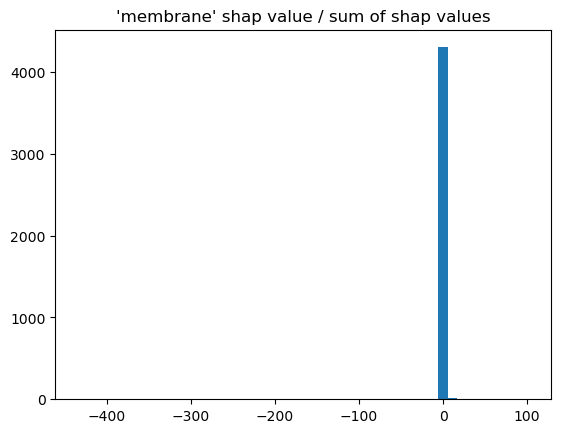

In [24]:
word = 'membrane'

word_shap_vals = collapsed_analysis['collapsed_word_sum_analysis'][0][word]
word_indexes = collapsed_analysis['collapsed_word_sum_analysis_indexes'][word]
shap_vals = shap_values_solubilityNEW.values
baselines = shap_values_solubilityNEW.base_values
shapValSum = lambda idx,class_: sum(list(map(lambda x: x[class_],shap_vals[idx])))

percent_contributions_positive_word_class = []
percent_contributions_weak_positive_word_class = []
negative_contribution = []

pred_Y = {}
n_membrane=0
for i,(gene,shap_val) in enumerate(zip(word_indexes,word_shap_vals)):
    sum_0 = shapValSum(gene,0) 
    sum_1 = shapValSum(gene,1)
    model_output_0 = sum_0 + baselines[gene][0]
    model_output_1 = sum_1 + baselines[gene][1]
    isMembrane = model_output_0 > model_output_1
    percent_contribution = shap_val/sum_0
        
    if isMembrane: percent_contributions_positive_word_class.append(percent_contribution)

    pred_Y[idx_to_gene[gene]] = 'Insoluble' if isMembrane else 'Soluble'
    
percent_contributions_positive_word_class = np.array(percent_contributions_positive_word_class)

print(f'N summaries containing {word}:\t\t', len(word_shap_vals))

print('highest percent contributions\n',np.sort(percent_contributions_positive_word_class)[::-1][:50],'\n')
print('median contribution',np.percentile(np.sort(percent_contributions_positive_word_class),50),'\n')
# plt.hist(np.sort(percent_contributions_positive_word_class),bins=50)
plt.hist(np.sort(percent_contributions_positive_word_class),bins=50)
plt.title('\'membrane\' shap value / sum of shap values')
plt.show()

# GENES IN TEST SET

len test set: 489
N instances of membrane in test set:		 279
N summaries containing membrane in test set:		 150
N soluble in test set:					 46 (30.7)%
N membrane in test set:					 104 (69.3)%

genes with annotations: 150
highest shap value
 [(2.320813089609146, 86, 155), (1.0276576387695968, 11746, 159), (1.0935635912852981, 11746, 159), (0.9289438475389034, 2274, 194), (0.5493527941871434, 3689, 230), (1.8304799613542855, 12798, 236), (2.8214570386335254, 10409, 238), (0.9105651515225569, 1645, 239), (0.09816951801379523, 1645, 239), (0.09200998935848476, 1645, 239), (0.4646693485168119, 13936, 253), (0.49044225341640413, 10999, 261), (0.41678789044575143, 12284, 262), (1.719725589454174, 4815, 318), (0.7292678916128352, 12956, 359), (1.0976204547091686, 12116, 411), (0.24011880159378052, 11538, 412), (0.32969391752525956, 11538, 412), (0.04256488072375456, 2284, 440), (0.40879208594560623, 5013, 449), (0.031017574786009, 13186, 465), (2.275207816467931, 13186, 465), (0.26511789477219

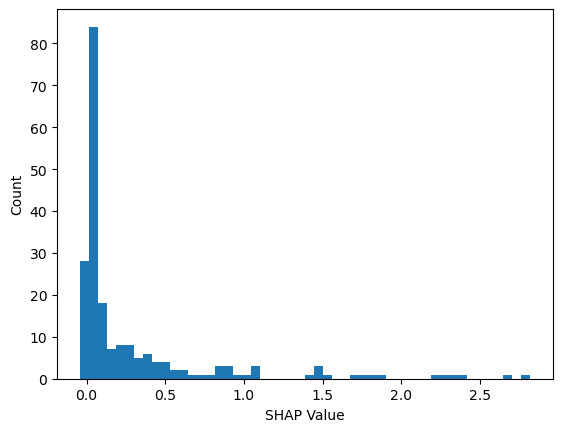

In [22]:
word = 'membrane'

word_shap_vals = collapsed_analysis['collapsed_word_sum_analysis'][0][word]
word_indexes = collapsed_analysis['collapsed_word_sum_analysis_indexes'][word]
shap_vals = shap_values_solubilityNEW.values
baselines = shap_values_solubilityNEW.base_values
shapValSum = lambda idx,class_: sum(list(map(lambda x: x[class_],shap_vals[idx])))

shap_values_positive_word_class = []
vals_and_idxs = []
soluble = []
negative_contribution = []
instances_in_test_set = 0
genes_in_test_set = 0
true_Y = {}
pred_Y = {}
n_membrane=0
n_soluble=0
for i,(gene,shap_val) in enumerate(zip(word_indexes,word_shap_vals)):
    if idx_to_gene[gene] in test_set: 
        sum_0 = shapValSum(gene,0) 
        sum_1 = shapValSum(gene,1)
        model_output_0 = sum_0 + baselines[gene][0]
        model_output_1 = sum_1 + baselines[gene][1]
        isMembrane = model_output_0 > model_output_1

        instances_in_test_set+=1
        if idx_to_gene[gene] not in true_Y:
            genes_in_test_set+=1
            if isMembrane: n_membrane+=1
            else: n_soluble+=1
            
        if isMembrane: 
            shap_values_positive_word_class.append(shap_val)
            vals_and_idxs.append((shap_val,gene,len(sentences[gene])))

        if idx_to_gene[gene] in membrane_genes: 
            true_Y[idx_to_gene[gene]] = 'Insoluble'
        elif idx_to_gene[gene] in soluble_genes: 
            true_Y[idx_to_gene[gene]] = 'Soluble'
        else: print('err')
        pred_Y[idx_to_gene[gene]] = 'Insoluble' if isMembrane else 'Soluble'

print(f'len test set: {len(test_set)}')
print(f'N instances of {word} in test set:\t\t', instances_in_test_set)
print(f'N summaries containing {word} in test set:\t\t', genes_in_test_set)
print('N soluble in test set:\t\t\t\t\t',n_soluble, f'({n_soluble/genes_in_test_set*100:.1f})%')
print('N membrane in test set:\t\t\t\t\t',genes_in_test_set-n_soluble, f'({(1-(n_soluble/genes_in_test_set))*100:.1f})%')
print('')
print('genes with annotations:', genes_in_test_set)
print('highest shap value\n',sorted(vals_and_idxs,key=lambda x: x[2]),'\n')
print('median shap value',np.percentile(np.sort(shap_values_positive_word_class),50),'\n')
plt.hist(np.sort(shap_values_positive_word_class),bins=50)
plt.ylabel('Count')
plt.xlabel('SHAP Value')
# plt.show()
plt.savefig('data/figures/suppFigs/membrane_shap_valuesNEW.pdf',bbox_inches='tight')

In [23]:
import textwrap
s=1823
print(textwrap.fill(sentences[s],100))
shap.plots.text(shap_values_solubilityNEW[s])

visualize_sentence(sentences, s, shap_values_solubilityNEW, classIdx=1, saveName='example_unimportant_membrane',saveDir='./data/figures/suppFigs/',saveType='.pdf', state_dict = 'solubility_3', metadata=stateDictMetadata, printSentence=False)

Predicted to enable identical protein binding activity. Involved in Golgi to lysosome transport.
Located in nucleoplasm and transGolgi network. Involved in the regulation of membrane traffic
through the transGolgi network (TGN). Functions in close cooperation with the GGAs in the sorting of
hydrolases to lysosomes.


NameError: name 'visualize_sentence' is not defined

In [ ]:
true_Y_notContainingMembrane = {}
pred_Y_notContainingMembrane = {}
# for i,(gene,shap_val) in enumerate(zip(word_indexes,word_shap_vals)):
not_found=[]
for entry in test_set:
    if entry not in gene_to_idx: 
        not_found.append(entry)
        continue
    gene = gene_to_idx[entry]
    if gene in word_indexes: continue # genes containing word ('membrane')
    sum_0 = shapValSum(gene,0) 
    sum_1 = shapValSum(gene,1)
    model_output_0 = sum_0 + baselines[gene][0]
    model_output_1 = sum_1 + baselines[gene][1]
    isMembrane = model_output_0 > model_output_1

    if idx_to_gene[gene] in membrane_genes: 
        true_Y_notContainingMembrane[idx_to_gene[gene]] = 'Insoluble'
    elif idx_to_gene[gene] in soluble_genes: 
        true_Y_notContainingMembrane[idx_to_gene[gene]] = 'Soluble'
    else: print('err')
    pred_Y_notContainingMembrane[idx_to_gene[gene]] = 'Insoluble' if isMembrane else 'Soluble'
print(len(not_found),'gene summaries not found in clean_genes of', len(test_set),'in test set')
print(not_found)

62 gene summaries not found in clean_genes of 1499 in training set
['NBPF1', 'RGPD6', 'AVPR2', 'PRKAR1B', 'TMEM130', 'CFAP418', 'TMLHE', 'OR51E1', 'SIT1', 'TOMM6', 'OR51E2', 'PDCL3', 'IQSEC3', 'POTED', 'TUBGCP6', 'IFNGR1', 'POLG', 'NPR2', 'TMEM167B', 'ICMT', 'PIK3IP1', 'CCDC116', 'C1orf116', 'SGSM3', 'PCBP3', 'SMIM14', 'RBMS3', 'VKORC1L1', 'NPIPA1', 'MANEA', 'ERN2', 'RASSF10', 'ASB8', 'FAM169A', 'CCDC90B', 'RASSF3', 'UGGT1', 'ADAMTSL4', 'SH3GLB2', 'DCTN1', 'CCDC146', 'C1RL', 'SLC35G2', 'HFE', 'OSTM1', 'UBTD2', 'KDSR', 'CEP95', 'MPC1', 'HTR1E', 'BOP1', 'OLFML1', 'C1orf198', 'LRP2BP', 'BCL2L2', 'CDK5R2', 'TMEM11', 'TRPA1', 'ITPRID2', 'GSTCD', 'EML2', 'UNC93A']


In [ ]:
all_words = collapsed_analysis['collapsed_word_sum_analysis'][0].keys()
all_words_with_membrane = []
for i in all_words:
    if 'membrane' in i: 
        all_words_with_membrane.append(i)

all_indexes_with_words_with_membrane = set()
for i in all_words_with_membrane:
    all_indexes_with_words_with_membrane.update(collapsed_analysis['collapsed_word_sum_analysis_indexes'][i])

print(len(all_indexes_with_words_with_membrane))

import textwrap
# Calculate the number of columns you want
num_columns = 5

# Split the list of words into sublists of length num_columns
words_in_columns = [all_words_with_membrane[i:i + num_columns] for i in range(0, len(all_words_with_membrane), num_columns)]

# Print each sublist as a row
for row in words_in_columns:
    print('\t'.join(f"{word:<20}" for word in row))

4243
membranebound       	membrane            	transmembrane       	membranespecific    	7transmembrane      
membraneanchored    	membraneassociated  	membranebinding     	cytoskeletalmembrane	intermembrane       
membranebounded     	integralmembrane    	membranespanning    	extramembraneous    	gradientmembrane    
transmembranespanning	endomembrane        	intramembrane       	membraneattached    	membraneassembled   
seventransmembrane  	6membranespanning   	membraneless        	membraneinitiated   	intramembranecleaving
proteinmembrane     	extramembrane       	membraneasociated   	membranedistal      	transmembraneephrin 
membranerelated     	biomembrane         	7transmembranehelix 	7transmembranespanning	plasmamembraneassociated
sixtransmembranedomain	membranelocalized   	endosometomembrane  	membraneanchoring   	promembrane         
cytolysinmembrane   	innermembrane       	12membranespanning  	juxtamembrane       	dcvsmembrane        
virusmembrane       	membranepermeable  

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

y_true = [true_Y[i] for i in true_Y]
y_pred = [pred_Y[i] for i in pred_Y]

confusion_matrix = pd.DataFrame(confusion_matrix(y_true, 
                                                 y_pred, 
                                                 labels = ['Insoluble','Soluble']),
                                                 index = ['Insoluble','Soluble'], 
                                                 columns = ['Insoluble','Soluble'])

print('containing \'membrane\'')
confusion_matrix


containing 'membrane'


,Membrane,Soluble
Membrane,370,14
Soluble,17,77


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

y_true = [true_Y_notContainingMembrane[i] for i in true_Y_notContainingMembrane]
y_pred = [pred_Y_notContainingMembrane[i] for i in pred_Y_notContainingMembrane]

confusion_matrix = pd.DataFrame(confusion_matrix(y_true, 
                                                 y_pred, 
                                                 labels = ['Insoluble','Soluble']),
                                                 index = ['Insoluble','Soluble'], 
                                                 columns = ['Insoluble','Soluble'])

print('not containing \'membrane\'')
confusion_matrix

not containing 'membrane'


,Membrane,Soluble
Membrane,269,43
Soluble,15,632


In [ ]:
from scipy.stats import fisher_exact
fisher_exact([[84,23],[96,8]])

SignificanceResult(statistic=0.823963963963964, pvalue=0.5886559134519653)

# Disease Association

In [8]:
diseases_of_interest = ['obesity','asthma','hypertension','schizophrenia']
shap_values_associated = {d:pickleLoad(f'DiseaseAssociation/shapValues/shap_values_{d}_associated.pkl') for d in diseases_of_interest}
shap_values_not_associated = {d:pickleLoad(f'DiseaseAssociation/shapValues/shap_values_{d}_na.pkl') for d in diseases_of_interest}

def getShapValuesByClusterForDisease(disease, cluster):
    genes_in_cluster = pd.read_csv(f'DiseaseAssociation/enrichment/GeneLLM_all_cluster{cluster}.txt',header=None)[0].to_list()
    shap_values = pickleLoad(f'DiseaseAssociation/shapValues/shap_values_{disease}_na.pkl')
    sentences = pickleLoad(f'DiseaseAssociation/shapValues/sentences_{disease}_na.pkl')
    indexes = pickleLoad(f'DiseaseAssociation/shapValues/sentence_indexes_{disease}_na.pkl')
    shapValsByIndex = {i:j for i,j in zip(indexes, shap_values)}
    sentenceByIndex = {i:j for i,j in zip(indexes, sentences)}
    shap_values_dict_temp = {'data':[],'values':[]}
    sentences_=[]
    indexes_ = []
    for g in genes_in_cluster:
        try: 
            idx = gene_to_idx[g]
        except: 
            idx = gene_to_idx[g+' ']
        if idx in indexes:
            sentence = sentenceByIndex[idx]
            sentences_.append(sentence)
            indexes_.append(idx)
            shap_vals = shapValsByIndex[idx]
            shap_values_dict_temp['data'].append(shap_vals.data)
            shap_values_dict_temp['values'].append(shap_vals.values)
    if len(sentences_)==0: return None
    explanation = shap.Explanation(values=shap_values_dict_temp['values'],data = shap_values_dict_temp['data'])
    pickleSave(explanation,f'DiseaseAssociation/shapValues_diseaseAndCluster/{disease}/shap_values/',f'shap_values_{disease}_cluster_{cluster}.pkl')
    pickleSave(sentences_,f'DiseaseAssociation/shapValues_diseaseAndCluster/{disease}/sentences/',f'sentences_{disease}_cluster_{cluster}.pkl')
    pickleSave(indexes_,f'DiseaseAssociation/shapValues_diseaseAndCluster/{disease}/indexes/',f'indexes_{disease}_cluster_{cluster}.pkl')


loading data from DiseaseAssociation/shapValues/shap_values_obesity_associated.pkl
loading data from DiseaseAssociation/shapValues/shap_values_asthma_associated.pkl
loading data from DiseaseAssociation/shapValues/shap_values_hypertension_associated.pkl
loading data from DiseaseAssociation/shapValues/shap_values_schizophrenia_associated.pkl
loading data from DiseaseAssociation/shapValues/shap_values_obesity_na.pkl
loading data from DiseaseAssociation/shapValues/shap_values_asthma_na.pkl
loading data from DiseaseAssociation/shapValues/shap_values_hypertension_na.pkl
loading data from DiseaseAssociation/shapValues/shap_values_schizophrenia_na.pkl


In [ ]:
for d in diseases_of_interest:
    for i in [0,1,2,3,4,5,6,7,8,10]:
        getShapValuesByClusterForDisease(d,i)

In [11]:
def analyzeTask(shap_values,collapse_params,percentile,savedir):
    kind = collapse_params['kind']

    savename=f'grouped_words_and_tokens'
    params = {'shap_values':shap_values}
    analysis = lazyRun(savedir,savename,getSHAPAnalysis,params,save=False)

    savename_collapsed = paramsToString(collapse_params)
    collapse_params['analysis'] = analysis
    collapsed_analysis = lazyRun(savedir,savename_collapsed,getCollpasedAnalysis,collapse_params,save=False)

    savename_percentile = f'collapsed_{kind}_{percentile}_percentile_analysis'
    params = {'analysis':collapsed_analysis,'percentile':percentile,'kind':f'collapsed_{kind}'}
    percentile_analysis = lazyRun(savedir,savename_percentile,getPercentileAnalysis,params,save=False)
    
    return percentile_analysis

percentile = 90
collapse_params = {'kind':'word_sum',
                   'minOccurences':2,
                   'minStringLength':1,
                    'maxStringLength':100,
                    'collapsePlural':True,
                    'stops':nltkStopwords}

def plotDiseaseShapAnalysis(shap_values_dict, collapse_params = collapse_params, percentile = percentile, diseases_of_interest = diseases_of_interest, suffix=None):
    top10 = {}
    for d in diseases_of_interest:
        percentile_analysis = analyzeTask(shap_values_dict[d],collapse_params,percentile,f'DiseaseAssociation/shapAnalysis_{d}{suffix}/')
        metadata = {f'Cosine Similarity to {d}':
                    {'labels': {0: f'Cosine Similarity to {d}'},
                    'name': f'Cosine Similarity to {d}'}
        }
        savedir_ = f'DiseaseAssociation/figures/{d}/'
        savename_ = f'{d}_bar_plot_1minOccurences'
        analysis = {f'Cosine Similarity to {d}': percentile_analysis}
        sentences_ = pickleLoad(f'DiseaseAssociation/shapValues/sentences_{d}{suffix}.pkl')
        result = generateBarPlot_allClasses(analysis,
                        'word_sum',
                        metadata,
                        makeLegend=False,
                        labelType='analysisName',
                        nToPlot=10, 
                        figuresize=(5,5),
                        # saveName=savename_,
                        saveDir=savedir_,
                        saveType='.pdf',
                        # legendOutside=True,
                        sentences = sentences_)
        top10[d] = result
    return top10

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesity_associated/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesity_associated/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179

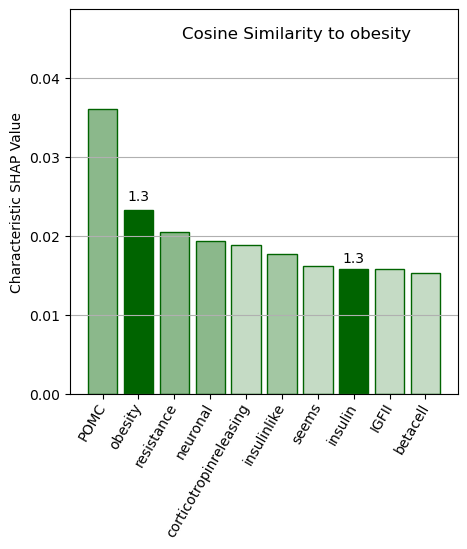

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthma_associated/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthma_associated/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179.p

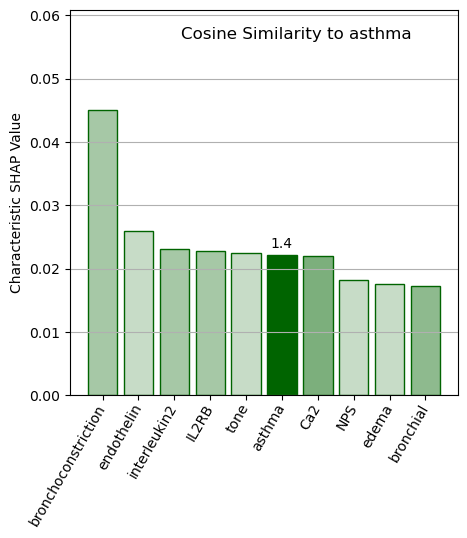

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertension_associated/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertension_associated/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True

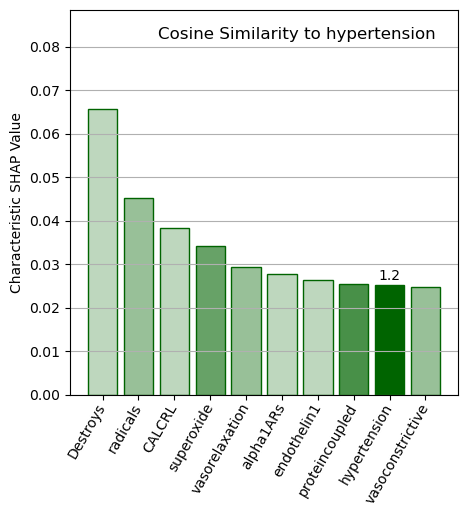

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophrenia_associated/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophrenia_associated/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_Tr

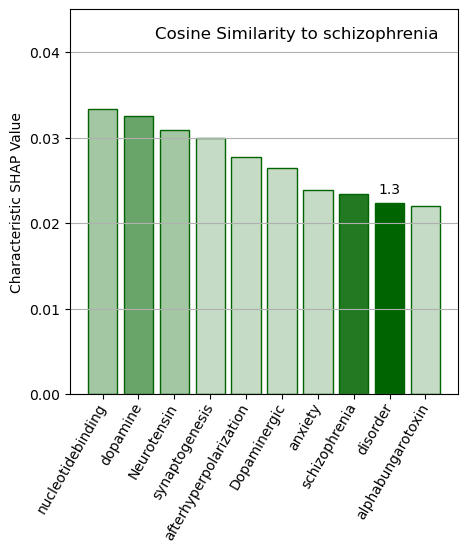

In [12]:
top10words_associated = plotDiseaseShapAnalysis(shap_values_associated, suffix='_associated')

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesity_na/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesity_na/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179.pkl
COLLAPSING 

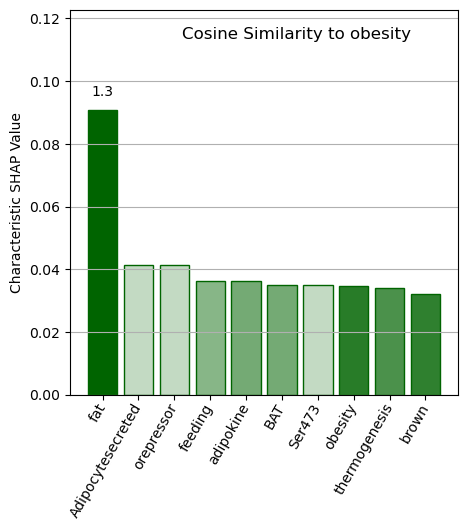

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthma_na/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthma_na/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179.pkl
COLLAPSING AN

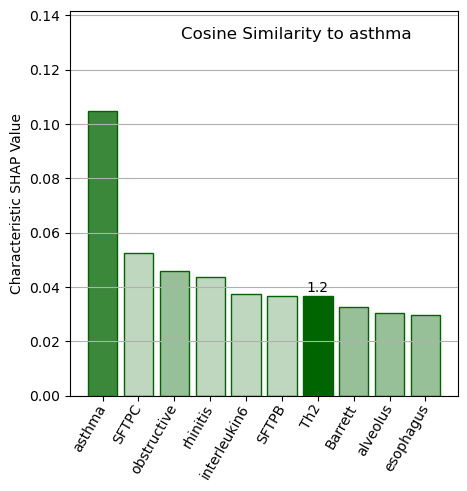

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertension_na/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertension_na/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179.pkl
C

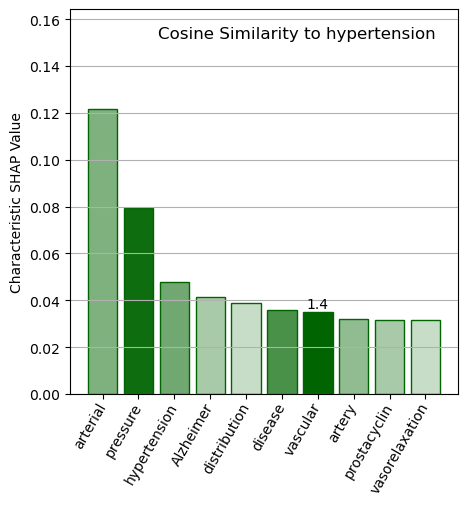

Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophrenia_na/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of lists; for each occurance of the word, a list of shap values of the tokens composing it
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophrenia_na/word_sum_minOccurences_2_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179.pkl

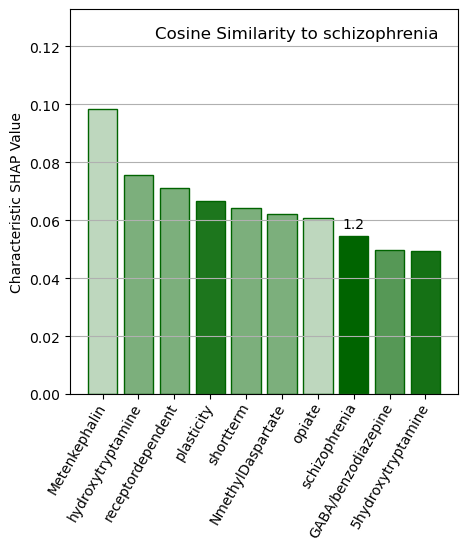

In [13]:
top10words_na = plotDiseaseShapAnalysis(shap_values_not_associated,suffix='_na')

In [30]:
def printstuff(top10words, disease, suffix):
    df = pd.DataFrame(top10words[f'{disease}']).transpose()
    df.columns = ['Word','Shap Value', 'Occurences']
    df.to_csv(f'DiseaseAssociation/top_words_by_disease/{disease}_{suffix}', index=False)
    print(f'\n{disease} {suffix}')
    df.to_csv(sys.stdout, index=False)
    print('')
    return df
for d in diseases_of_interest:
    printstuff(top10words_associated, d, 'a')
    printstuff(top10words_na,d,'na')



obesity a
Word,Shap Value,Occurences
POMC,0.03604918308177411,4
obesity,0.023332648236598624,21
resistance,0.02046548357332182,4
neuronal,0.019339657314049984,4
corticotropinreleasing,0.01881614360576809,2
insulinlike,0.017731201834976673,3
seems,0.016213454382959753,2
insulin,0.015840838204271027,21
IGFII,0.015811471462626098,2
betacell,0.015334892591528166,2


obesity na
Word,Shap Value,Occurences
fat,0.09095330501978212,18
Adipocytesecreted,0.04151107334579604,2
orepressor,0.041475308725299934,2
feeding,0.03634170953125686,4
adipokine,0.036155469171129745,5
BAT,0.03508107359436426,5
Ser473,0.03498112183995545,2
obesity,0.034817615314830276,12
thermogenesis,0.03389890737210711,7
brown,0.03216305188834667,11


asthma a
Word,Shap Value,Occurences
bronchoconstriction,0.04502927503507652,3
endothelin,0.026025068637811476,2
interleukin2,0.023114203747421035,3
IL2RB,0.022741097886954012,3
tone,0.022472421769767974,2
asthma,0.022166272965038106,22
Ca2,0.022042020773841885,5
NPS,0.018250376

shap_values_obesity_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/sentences/sentences_obesity_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/shap_values/shap_values_obesity_cluster_3.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesityNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_values input
    word_sum_analysis:          key = word      value = list of shap values across all instances, summed over all tokens in the word
    word_sum_analysis_indexes:  key = word      value = list of indexes in word_sum_analysis corresponding to the gene's index in shap_values input
    shap_vals_by_word:          key = word      value = list of li

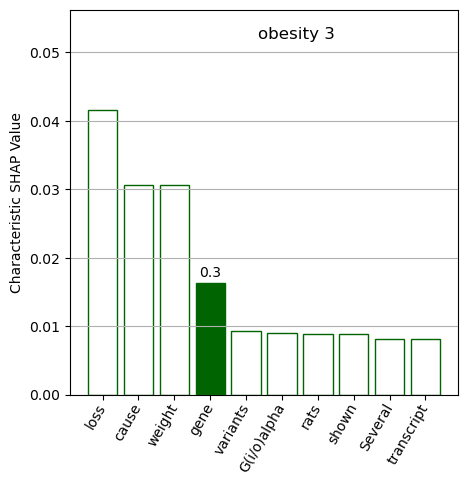

[['loss', 'cause', 'weight', 'gene', 'variants', 'G(i/o)alpha', 'rats', 'shown', 'Several', 'transcript'], [0.04165983966297724, 0.030575135828588496, 0.030575135828588496, 0.016361913296558925, 0.00935513434338976, 0.00902888427749613, 0.008837752150033008, 0.008813126584176312, 0.008202200302515518, 0.008202200302515518], [1, 1, 1, 2, 1, 1, 1, 1, 1, 1]]
shap_values_obesity_cluster_4.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/sentences/sentences_obesity_cluster_4.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/shap_values/shap_values_obesity_cluster_4.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesityNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's index in shap_va

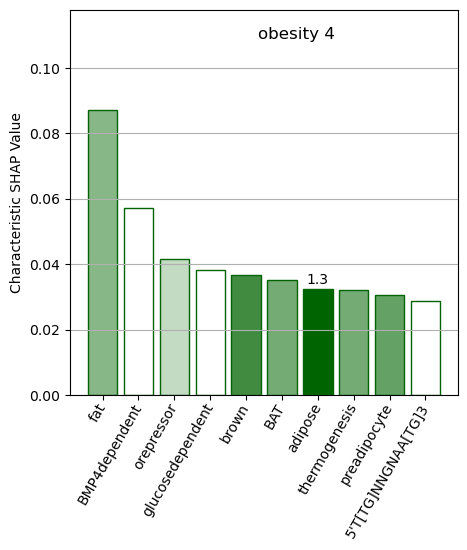

[['fat', 'BMP4dependent', 'orepressor', 'glucosedependent', 'brown', 'BAT', 'adipose', 'thermogenesis', 'preadipocyte', "5'T[TG]NNGNAA[TG]3"], [0.0872574630358185, 0.057194356340914965, 0.041475308725299934, 0.038226727063634565, 0.036806426070009675, 0.03508107359436426, 0.03241783954001413, 0.03221983077577674, 0.030428478494286537, 0.028744496373030216], [4, 1, 2, 1, 9, 5, 18, 5, 6, 1]]
shap_values_obesity_cluster_5.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/sentences/sentences_obesity_cluster_5.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/shap_values/shap_values_obesity_cluster_5.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesityNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis correspon

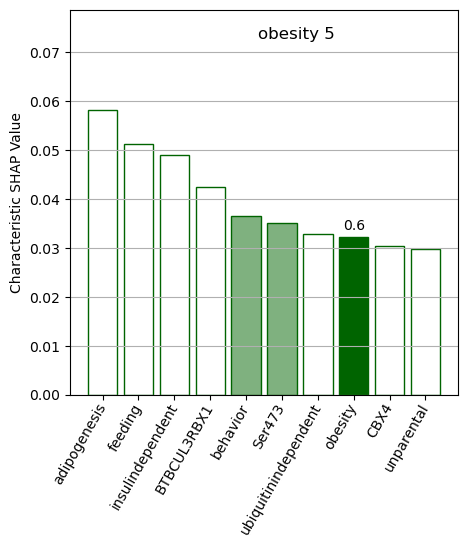

[['adipogenesis', 'feeding', 'insulindependent', 'BTBCUL3RBX1', 'behavior', 'Ser473', 'ubiquitinindependent', 'obesity', 'CBX4', 'unparental'], [0.05821793086250268, 0.05114777026335812, 0.04896478887115207, 0.04234325742492309, 0.036424294423110286, 0.03498112183995545, 0.032756615508920874, 0.032164249030562746, 0.03028504880001912, 0.029803058942758167], [1, 1, 1, 1, 2, 2, 1, 4, 1, 1]]
shap_values_obesity_cluster_8.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/sentences/sentences_obesity_cluster_8.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/obesity/shap_values/shap_values_obesity_cluster_8.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_obesityNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis correspond

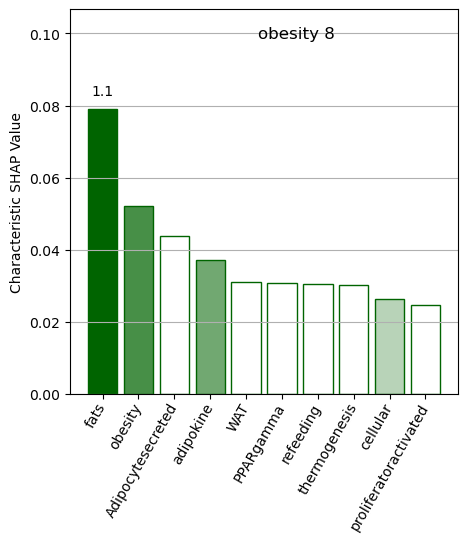

[['fats', 'obesity', 'Adipocytesecreted', 'adipokine', 'WAT', 'PPARgamma', 'refeeding', 'thermogenesis', 'cellular', 'proliferatoractivated'], [0.07899919398173337, 0.05205065741443611, 0.04383610161021352, 0.037152564837597324, 0.0310449699871242, 0.030916049610823396, 0.03059693047886386, 0.030211247814198337, 0.02633550053983602, 0.024662883253768086], [12, 6, 1, 4, 1, 1, 1, 1, 2, 1]]
shap_values_asthma_cluster_0.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/sentences/sentences_asthma_cluster_0.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/shap_values/shap_values_asthma_cluster_0.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthmaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to 

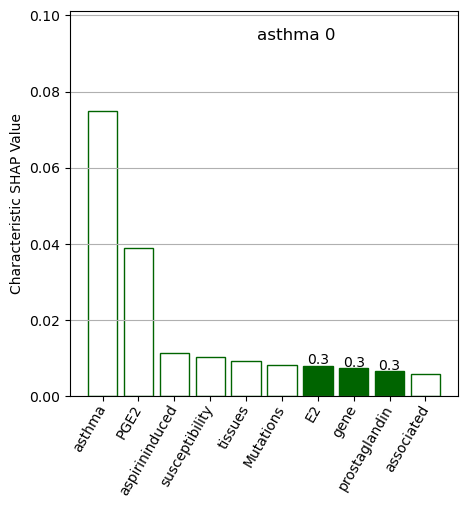

[['asthma', 'PGE2', 'aspirininduced', 'susceptibility', 'tissues', 'Mutations', 'E2', 'gene', 'prostaglandin', 'associated'], [0.07486520987004042, 0.03895986605701702, 0.011481649335473774, 0.010213584639132023, 0.009261706659990345, 0.008347799954935908, 0.008027694384966578, 0.00744037237484008, 0.00655695867680368, 0.005851207021623849], [1, 1, 1, 1, 1, 1, 2, 2, 2, 1]]
shap_values_asthma_cluster_7.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/sentences/sentences_asthma_cluster_7.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/shap_values/shap_values_asthma_cluster_7.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthmaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's inde

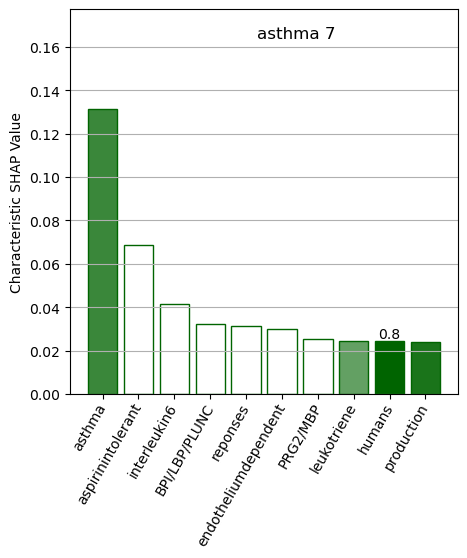

[['asthma', 'aspirinintolerant', 'interleukin6', 'BPI/LBP/PLUNC', 'reponses', 'endotheliumdependent', 'PRG2/MBP', 'leukotriene', 'humans', 'production'], [0.1313524911405914, 0.0688059392074744, 0.0415735705755651, 0.032340378049784936, 0.031341252472471964, 0.030184228206053376, 0.025501783423794385, 0.024502913898389257, 0.02448575849921011, 0.024115936328243055], [4, 1, 1, 1, 1, 1, 1, 3, 6, 5]]
shap_values_asthma_cluster_1.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/sentences/sentences_asthma_cluster_1.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/shap_values/shap_values_asthma_cluster_1.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthmaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresp

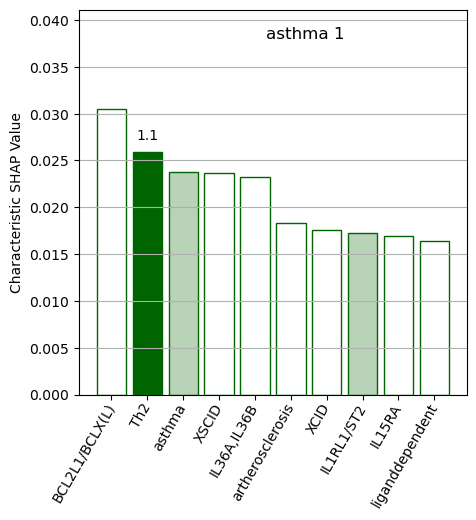

[['BCL2L1/BCLX(L)', 'Th2', 'asthma', 'XSCID', 'IL36A,IL36B', 'artherosclerosis', 'XCID', 'IL1RL1/ST2', 'IL15RA', 'liganddependent'], [0.03045484466681711, 0.025889993445744774, 0.02372750039571227, 0.023697937564814787, 0.02327419403487503, 0.018334137367923838, 0.01760139557446244, 0.017224963307499303, 0.01697198372628344, 0.0163800519761478], [1, 12, 2, 1, 1, 1, 1, 2, 1, 1]]
shap_values_asthma_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/sentences/sentences_asthma_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/shap_values/shap_values_asthma_cluster_3.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthmaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corresponding to the gene's

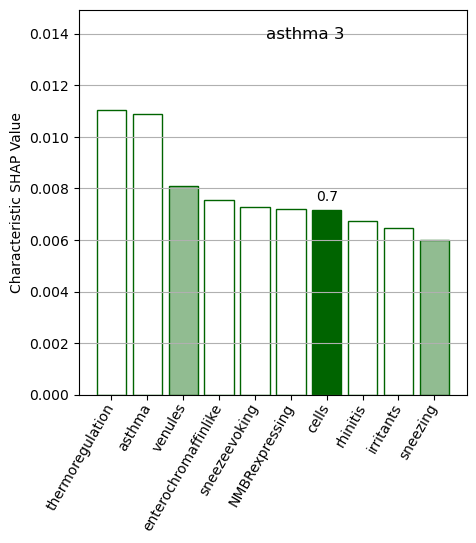

[['thermoregulation', 'asthma', 'venules', 'enterochromaffinlike', 'sneezeevoking', 'NMBRexpressing', 'cells', 'rhinitis', 'irritants', 'sneezing'], [0.011054019560585465, 0.010875076654234102, 0.008091461648892032, 0.007546497839588927, 0.007262059263526819, 0.0071962203032204086, 0.0071745548988371, 0.0067558988939882035, 0.006455891113728284, 0.006000052499806599], [1, 1, 2, 1, 1, 1, 5, 1, 1, 2]]
shap_values_asthma_cluster_6.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/sentences/sentences_asthma_cluster_6.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/asthma/shap_values/shap_values_asthma_cluster_6.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_asthmaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corre

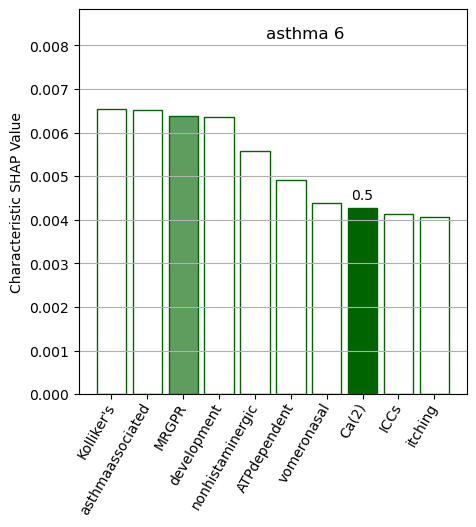

[["Kolliker's", 'asthmaassociated', 'MRGPR', 'development', 'nonhistaminergic', 'ATPdependent', 'vomeronasal', 'Ca(2)', 'ICCs', 'itching'], [0.006540926532150605, 0.006512250768688115, 0.006385251348315922, 0.00634761210091205, 0.005578628454473021, 0.004916767215993452, 0.004379459077034941, 0.00426736440595417, 0.004135770559887156, 0.004075327844148966], [1, 1, 2, 1, 1, 1, 1, 3, 1, 1]]
shap_values_hypertension_cluster_6.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_6.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_6.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexe

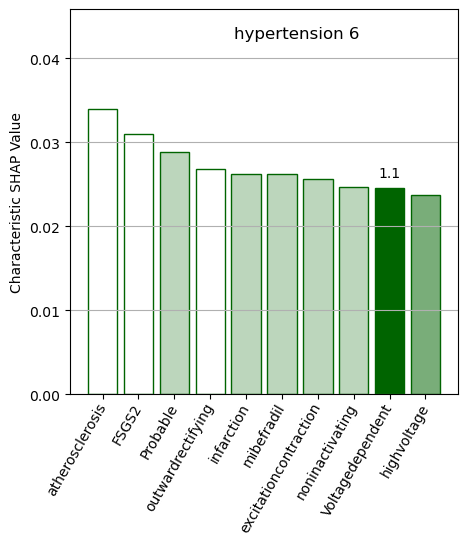

[['atherosclerosis', 'FSGS2', 'Probable', 'outwardrectifying', 'infarction', 'mibefradil', 'excitationcontraction', 'noninactivating', 'Voltagedependent', 'highvoltage'], [0.03399123835797403, 0.030993911629302078, 0.02888927316861031, 0.026794002137245823, 0.02624677031763183, 0.02619785365147566, 0.025581602765336522, 0.02470824084434003, 0.02459610566881676, 0.023717696516031866], [1, 1, 2, 1, 2, 2, 2, 2, 13, 4]]
shap_values_hypertension_cluster_0.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_0.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_0.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = toke

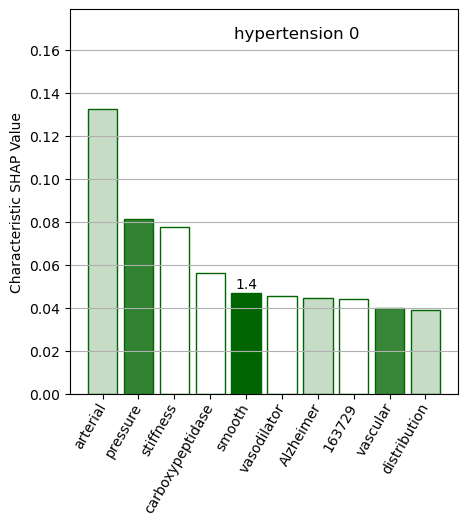

[['arterial', 'pressure', 'stiffness', 'carboxypeptidase', 'smooth', 'vasodilator', 'Alzheimer', '163729', 'vascular', 'distribution'], [0.13251600248085407, 0.08155047982423143, 0.07780341554630119, 0.05619840510189533, 0.04701731687902272, 0.04574697796600119, 0.04465995042150518, 0.04422463607131221, 0.040033993706773886, 0.038959880443152184], [2, 12, 1, 1, 24, 1, 2, 1, 12, 2]]
shap_values_hypertension_cluster_4.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_4.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_4.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in to

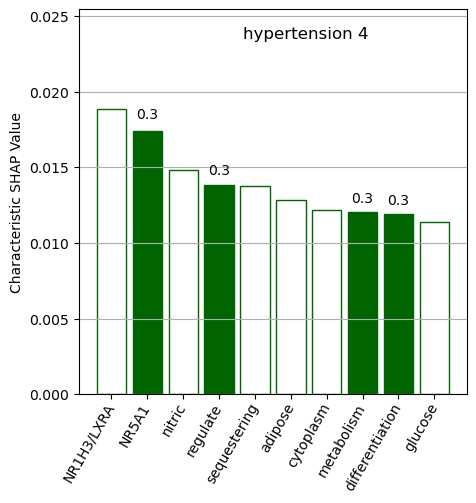

[['NR1H3/LXRA', 'NR5A1', 'nitric', 'regulate', 'sequestering', 'adipose', 'cytoplasm', 'metabolism', 'differentiation', 'glucose'], [0.01883507901842939, 0.017382048915571956, 0.014832718009572653, 0.013811576279100277, 0.013744987702618042, 0.012810982830647934, 0.012155083008110523, 0.012054782819856578, 0.011940629752327247, 0.011376549512328159], [1, 2, 1, 2, 1, 1, 1, 2, 2, 1]]
shap_values_hypertension_cluster_5.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_5.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_5.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in to

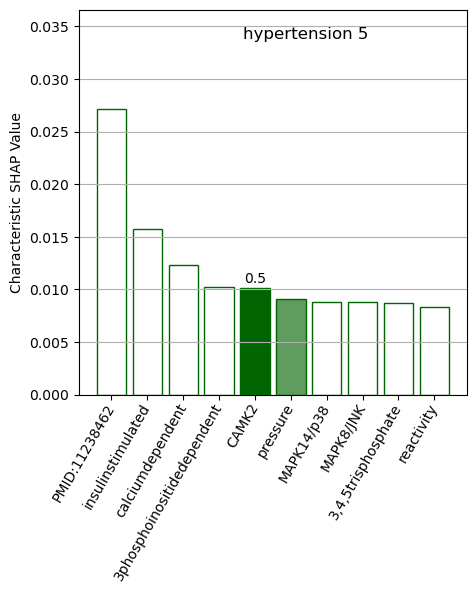

[['PMID:11238462', 'insulinstimulated', 'calciumdependent', '3phosphoinositidedependent', 'CAMK2', 'pressure', 'MAPK14/p38', 'MAPK8/JNK', '3,4,5trisphosphate', 'reactivity'], [0.02710440019632856, 0.015703672331279863, 0.012301733837487745, 0.010272706535047783, 0.010132038191167935, 0.00904346444901099, 0.008840733267154706, 0.008810140106028744, 0.00871096255014468, 0.008358911897558424], [1, 1, 1, 1, 3, 2, 1, 1, 1, 1]]
shap_values_hypertension_cluster_2.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_2.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_2.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key 

invalid value encountered in scalar divide


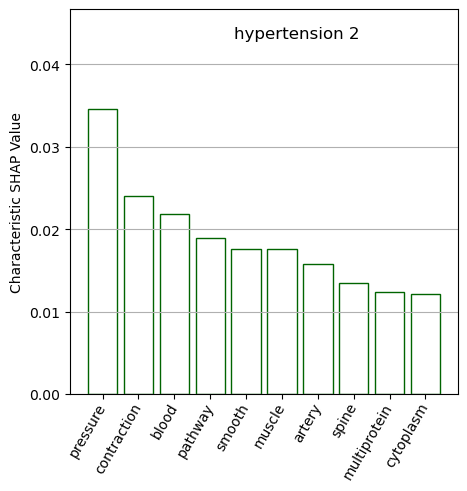

[['pressure', 'contraction', 'blood', 'pathway', 'smooth', 'muscle', 'artery', 'spine', 'multiprotein', 'cytoplasm'], [0.03459064821617153, 0.024001760398900826, 0.021883936800982037, 0.018903738635868493, 0.017589550189018907, 0.017589550189018907, 0.015775993190050783, 0.013475466392756928, 0.012405371679998344, 0.012145916504132282], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
shap_values_hypertension_cluster_8.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_8.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_8.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis c

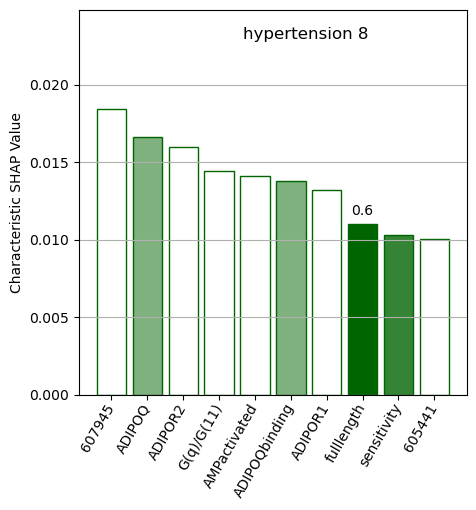

[['607945', 'ADIPOQ', 'ADIPOR2', 'G(q)/G(11)', 'AMPactivated', 'ADIPOQbinding', 'ADIPOR1', 'fulllength', 'sensitivity', '605441'], [0.01839453616329689, 0.016646888700623984, 0.015968352494607294, 0.014436800150663539, 0.014088476018514484, 0.013795334155631469, 0.013180733061124826, 0.011030726533302062, 0.010319768884539525, 0.010009844991197534], [1, 2, 1, 1, 1, 2, 1, 4, 3, 1]]
shap_values_hypertension_cluster_10.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_10.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_10.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in 

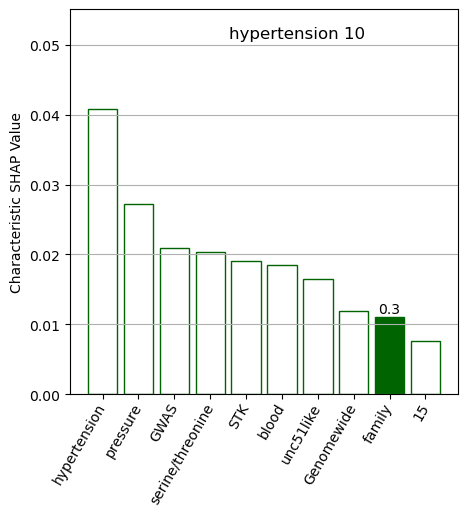

[['hypertension', 'pressure', 'GWAS', 'serine/threonine', 'STK', 'blood', 'unc51like', 'Genomewide', 'family', '15'], [0.04080437585556259, 0.02715714235091582, 0.020879625208984287, 0.020295499405020255, 0.01912760876047497, 0.01856151345418766, 0.01643671737608565, 0.01184363363238124, 0.011069863196211574, 0.007568380418455317], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1]]
shap_values_hypertension_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/sentences/sentences_hypertension_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/hypertension/shap_values/shap_values_hypertension_cluster_3.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_hypertensionNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes in token_analysis corres

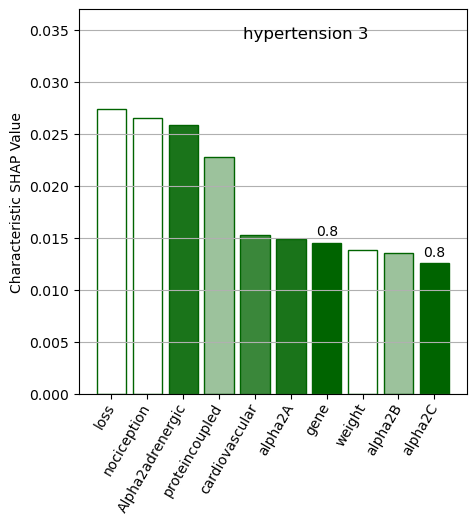

[['loss', 'nociception', 'Alpha2adrenergic', 'proteincoupled', 'cardiovascular', 'alpha2A', 'gene', 'weight', 'alpha2B', 'alpha2C'], [0.027375647579460885, 0.026481868379050862, 0.025788784451584102, 0.02280237420791602, 0.01527205551464222, 0.014918217174681175, 0.01455389704891151, 0.013805980995212767, 0.013549117261165934, 0.012596448151174298], [1, 1, 5, 2, 4, 5, 6, 1, 2, 6]]
shap_values_schizophrenia_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/schizophrenia/sentences/sentences_schizophrenia_cluster_3.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/schizophrenia/shap_values/shap_values_schizophrenia_cluster_3.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophreniaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token     value = list of indexes 

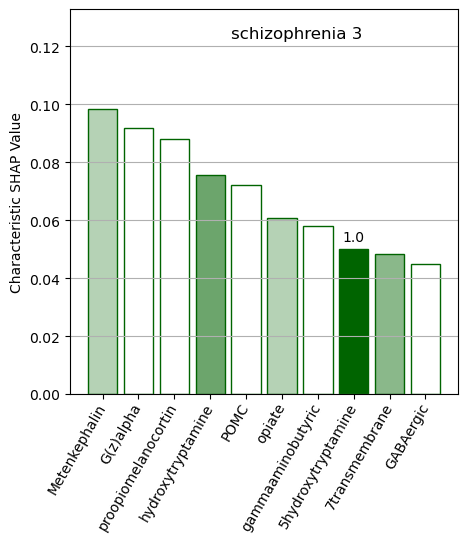

[['Metenkephalin', 'G(z)alpha', 'proopiomelanocortin', 'hydroxytryptamine', 'POMC', 'opiate', 'gammaaminobutyric', '5hydroxytryptamine', '7transmembrane', 'GABAergic'], [0.09840357470949992, 0.09199696051655337, 0.08790192205924541, 0.0755111869632075, 0.07217132069636135, 0.06066660842454, 0.05820362479425967, 0.05021577105591339, 0.04853761785717826, 0.04482482771466796], [2, 1, 1, 4, 1, 2, 1, 11, 3, 1]]
shap_values_schizophrenia_cluster_2.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/schizophrenia/sentences/sentences_schizophrenia_cluster_2.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/schizophrenia/shap_values/shap_values_schizophrenia_cluster_2.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophreniaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     key = token   

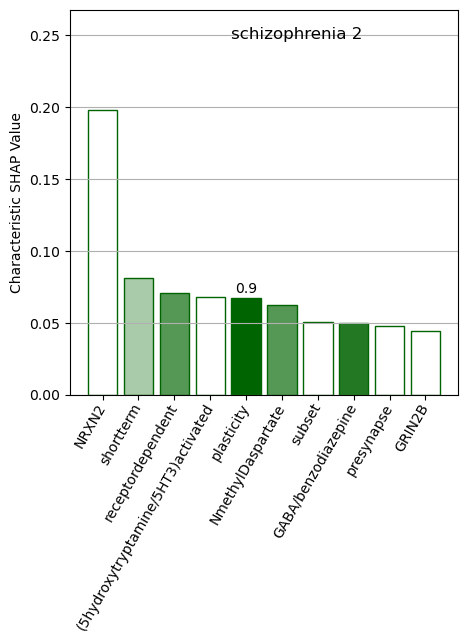

[['NRXN2', 'shortterm', 'receptordependent', '(5hydroxytryptamine/5HT3)activated', 'plasticity', 'NmethylDaspartate', 'subset', 'GABA/benzodiazepine', 'presynapse', 'GRIN2B'], [0.1981407143175602, 0.0815152038107485, 0.07094470621086657, 0.06778347613179082, 0.06727190400706604, 0.06227254413760102, 0.050527315062936395, 0.049878916513296734, 0.0480879710521549, 0.044706581001224405], [1, 2, 4, 1, 7, 4, 1, 6, 1, 1]]
shap_values_schizophrenia_cluster_10.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/schizophrenia/sentences/sentences_schizophrenia_cluster_10.pkl
loading data from DiseaseAssociation/shapValues_diseaseAndCluster/schizophrenia/shap_values/shap_values_schizophrenia_cluster_10.pkl
Load failed. File does not exist: DiseaseAssociation/shapAnalysis_schizophreniaNone/grouped_words_and_tokens.pkl
Analyzing SHAP Values

returning:
    token_analysis:             key = token     value = list of shap values across all instances
    token_analysis_indexes:     k

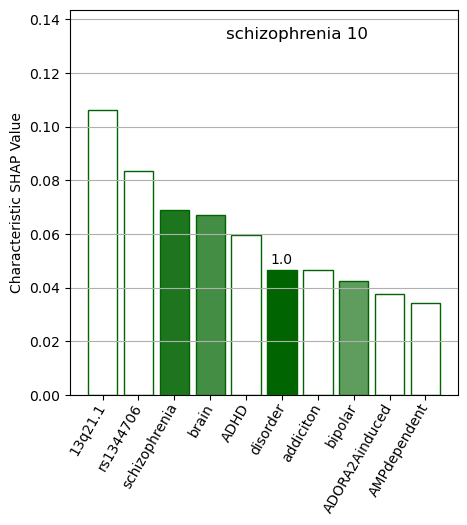

[['13q21.1', 'rs1344706', 'schizophrenia', 'brain', 'ADHD', 'disorder', 'addiciton', 'bipolar', 'ADORA2Ainduced', 'AMPdependent'], [0.10632958345554976, 0.08353225835599005, 0.06907177195418626, 0.06717974091658281, 0.05976788809389941, 0.046681626391863185, 0.04660945291786144, 0.04245150339166036, 0.03743580392320667, 0.03434160789898173], [1, 1, 7, 5, 1, 9, 1, 4, 1, 1]]


In [43]:
percentile = 90
collapse_params = {'kind':'word_sum',
                   'minOccurences':1,
                   'minStringLength':1,
                    'maxStringLength':100,
                    'collapsePlural':True,
                    'stops':nltkStopwords}
        

clustersMetadata_disease = {'0':{'name':'GPCR downstream signaling'},
                    '1':{'name':'Immune System'},
                    '2':{'name':'Neuronal System'},
                    '3':{'name':'Signaling by GPCR'},
                    '4':{'name':'Circadian Clock'},
                    '5':{'name':'mTOR signaling'},
                    '6':{'name':'Cardiac conduction'},
                    '7':{'name':'Innate Immune System'},
                    '8':{'name':'Metabolism'},
                    '10':{'name':'Dopamine receptors'}}


def plotDiseaseShapAnalysis(collapse_params = collapse_params, percentile = percentile, diseases_of_interest = diseases_of_interest, suffix=None):
    top10={}
    for d in diseases_of_interest:
        rootPath = f'DiseaseAssociation/shapValues_diseaseAndCluster/{d}'
        for shap_vals_filename in os.listdir(f'{rootPath}/shap_values/'):
            print(shap_vals_filename)
            sentences_filename = shap_vals_filename.replace('shap_values','sentences')
            sentences_ = pickleLoad(f'{rootPath}/sentences/{sentences_filename}')
            shap_values = pickleLoad(f'{rootPath}/shap_values/{shap_vals_filename}')
            percentile_analysis = analyzeTask(shap_values,collapse_params,percentile,f'DiseaseAssociation/shapAnalysis_{d}{suffix}/')
            clusterNo = sentences_filename.split('_')[-1][:-4]
            analysisName = f'{d} {clusterNo}'
            metadata = {analysisName:
                        {'labels': {0: f'Cosine Similarity to {d}'},
                        'name': f'Cosine Similarity to {d}'}
            }
            savedir_ = f'DiseaseAssociation/figures/{d}/'
            savename_ = f'{d}_bar_plot_1minOccurences'
            analysis = {analysisName: percentile_analysis}
            top = generateBarPlot_allClasses(analysis,
                            'word_sum',
                            metadata,
                            makeLegend=False,
                            labelType='analysisName',
                            nToPlot=10, 
                            figuresize=(5,5),
                            # saveName=savename_,
                            saveDir=savedir_,
                            saveType='.pdf',
                            # legendOutside=True,
                            sentences = sentences_)
            print(top)
            top10[analysisName]= top[0],list(map(lambda x: f'{x:.2f}',top[1])),list(map(lambda x: f'{x}',top[2]))
    return top10

top10 = plotDiseaseShapAnalysis()

In [44]:
def print_aligned_columns(*lists):
    num_lists = len(lists)
    if not all(len(lists[0]) == len(lst) for lst in lists):
        raise ValueError("All lists must have the same length")

    max_lengths = [0] * num_lists
    for i in range(len(lists[0])):
        for j in range(num_lists):
            max_lengths[j] = max(max_lengths[j], len(lists[j][i]))

    # Print header
    for j in range(num_lists):
        print(" " * (max_lengths[j] - len("soluble") + 1), end="")
        if j % 3 == 2:
            print("\t", end="")
    print('\n')

    # Print aligned columns
    for i in range(len(lists[0])):
        row = []
        for j in range(num_lists):
            row.append(lists[j][i] + " " * (max_lengths[j] - len(lists[j][i]) + 1))
            if j % 3 == 2:
                row[-1] += "        "
        print(" ".join(row))

for key,vals in top10.items():
    cluster = key.split(' ')[1]
    print(key, clustersMetadata_disease[cluster]['name'])
    print_aligned_columns(vals[0],vals[1],vals[2])
    print('\n\n')

obesity 3 Signaling by GPCR
     	

loss         0.04  1         
cause        0.03  1         
weight       0.03  1         
gene         0.02  2         
variants     0.01  1         
G(i/o)alpha  0.01  1         
rats         0.01  1         
shown        0.01  1         
Several      0.01  1         
transcript   0.01  1         



obesity 4 Circadian Clock
            	

fat                 0.09  4          
BMP4dependent       0.06  1          
orepressor          0.04  2          
glucosedependent    0.04  1          
brown               0.04  9          
BAT                 0.04  5          
adipose             0.03  18         
thermogenesis       0.03  5          
preadipocyte        0.03  6          
5'T[TG]NNGNAA[TG]3  0.03  1          



obesity 5 mTOR signaling
              	

adipogenesis          0.06  1         
feeding               0.05  1         
insulindependent      0.05  1         
BTBCUL3RBX1           0.04  1         
behavior              0.04  2         


In [21]:
# Disease # Top 10 Unknown Genes # Top 5 Pathways (for top 100 genes) # Top 5 words for top 100 genes

1964 1964
loading data from solubilityNEW/clean_genes_solubilityNEW.pkl
saved to solubilityNEW/clean_genes_solubilityNEW_filtered.pkl
loading data from solubilityNEW/clean_genes_solubilityNEW_filtered.pkl
loading data from solubilityNEW/grouped_words_and_tokens.pkl
loading data from solubilityNEW/word_sum_minOccurences_100_minStringLength_1_maxStringLength_100_collapsePlural_True_stops_179.pkl
loading data from solubilityNEW/collapsed_word_sum_90_percentile_analysis.pkl
saved to solubilityNEW/analysis_solubilityNEW.pkl
loading data from solubilityNEW/analysis_solubilityNEW.pkl


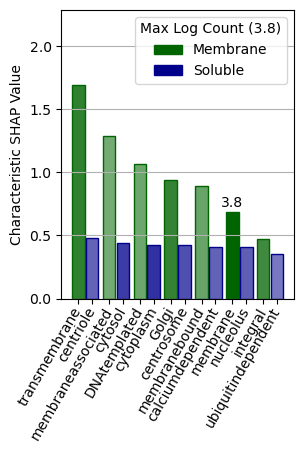

[['transmembrane',
  'membraneassociated',
  'DNAtemplated',
  'Golgi',
  'membranebound',
  'membrane',
  'integral'],
 [1.694249108125223,
  1.2877293977214133,
  1.0642319635643318,
  0.9419954449584961,
  0.8946100463467357,
  0.6885971772077029,
  0.4728951928979951],
 [1251, 118, 144, 1049, 177, 6266, 720],
 ['centriole',
  'cytosol',
  'cytoplasm',
  'centrosome',
  'calciumdependent',
  'nucleolus',
  'ubiquitindependent'],
 [0.4770798948360317,
  0.43975251442250074,
  0.42542391084910697,
  0.42330084621484976,
  0.41200871560537405,
  0.40912689534015956,
  0.3559150354555136],
 [7782, 11063, 7271, 13712, 141, 2021, 11262]]

In [11]:
input_data_path = "clean_genes.csv"
gene_loaded_data = pd.read_csv(input_data_path)
sentences = gene_loaded_data["Summary"].tolist()
geneNames = gene_loaded_data["Gene name"].tolist()
gene_to_idx = {gene.strip():idx for idx, gene in enumerate(geneNames)}
idx_to_gene = {idx:gene for gene, idx in gene_to_idx.items()}
sol_training = pd.read_csv('/data/ajararweh/solubility/solubility_dataset.csv')
sol_training_idxs = [gene_to_idx[gene] for gene in sol_training['Gene name'].values if gene in gene_to_idx]
print(len(sol_training['Gene name'].values) ,len(sol_training_idxs))

percentile=90
collapse_params = {'kind':'word_sum',
                   'minOccurences':100,
                   'minStringLength':1,
                    'maxStringLength':100,
                    'collapsePlural':True,
                    'stops':nltkStopwords}

shap_values = pickleLoad('solubilityNEW/clean_genes_solubilityNEW.pkl')

### FILTER OUT TRAINING DATA ###
save_dir = 'solubilityNEW/'
shap_values_dict_temp = {'data':[],'values':[]}
idxs = [i for i in range(len(shap_values.data)) if i not in sol_training_idxs]
for i in idxs:
    shap_values_dict_temp['data'].append(shap_values.data[i])
    shap_values_dict_temp['values'].append(shap_values.values[i])
explanation = shap.Explanation(values=shap_values_dict_temp['values'],data = shap_values_dict_temp['data'])
pickleSave(explanation,save_dir,'clean_genes_solubilityNEW_filtered.pkl')
###############################

## note: I did not pass the new index list to analyzeTask, so the indexes in the analysis are relative to the filtered shap values. Access the sentences by using .join on the shap_values.data

shap_values_filtered = pickleLoad('solubilityNEW/clean_genes_solubilityNEW_filtered.pkl')
savedir = 'solubilityNEW/'
analysis_solubilityNEW = analyzeTask(shap_values_filtered,collapse_params,percentile,savedir)
pickleSave(analysis_solubilityNEW,'solubilityNEW/','analysis_solubilityNEW.pkl')

metadata = stateDictMetadata
state_dict = 'solubility_3'
savedir_ = 'solubilityNEW/'
savename_= 'solubilityNEW_bar_plot_100minOccurences'
analysis_solubilityNEW = pickleLoad('solubilityNEW/analysis_solubilityNEW.pkl')
analysis = {state_dict: analysis_solubilityNEW}
generateBarPlot_allClasses(analysis,
                    'word_sum',
                    metadata,
                    makeLegend=True,
                    labelType=None,
                    nToPlot=7, 
                    figuresize=(3,3.75),
                    # saveName=savename_,
                    saveDir=savedir_,
                    saveType='.pdf',
                    legendOutside=False)


In [25]:
# def analyzeClustersNEW(collapse_params,percentile,nClusters):
#     analyses = {}
#     kind = collapse_params['kind']
#     for i in range(nClusters):
#         print('\nCLUSTER',i,'\n')

#         shap_values = pickleLoad(f'solubilityNEW/shapValues_clusters2/cluster{i}.pkl')
        
#         savedir = f'solubilityNEW/SHAPAnalysis/clusters2/base/cluster{i}/'
#         savename=f'grouped_word_and_tokens'
#         params={'shap_values':shap_values}
#         analysis = lazyRun(savedir,savename,getSHAPAnalysis,params)

#         savedir = f'solubilityNEW/SHAPAnalysis/clusters2/collapsed/cluster{i}/'
#         savename_collapsed = paramsToString(collapse_params)
#         collapse_params['analysis'] = analysis
#         collapsed_analysis = lazyRun(savedir,savename_collapsed,getCollpasedAnalysis,collapse_params)

#         savedir = f'solubilityNEW/SHAPAnalysis/clusters2/percentile/cluster{i}/{savename_collapsed}/'
#         savename = f'collapsed_{kind}_{percentile}_percentile_analysis'
#         params = {'analysis':collapsed_analysis,'percentile':percentile,'kind':f'collapsed_{kind}'}
#         percentile_analysis = lazyRun(savedir,savename,getPercentileAnalysis,params)
#         analyses[f'{i}'] = percentile_analysis
#         print('\n---------------------\n')
#     return analyses

# ## SOLUBILITY GO
# percentile=90
# collapse_params = {'kind':'word_sum',
#                    'minOccurences':10,
#                    'minStringLength':1,
#                     'maxStringLength':100,
#                     'collapsePlural':True,
#                     'stops':nltkStopwords}

# nClusters = 46
# analyses_NEW_clusters = analyzeClustersNEW(collapse_params,percentile,nClusters)
# pickleSave(analyses_NEW_clusters,'solubilityNEW/','analyses_clusters_10minOccurences2.pkl')

analyses = pickleLoad('solubilityNEW/analyses_clusters_10minOccurences2.pkl')
metadata = clustersMetadataNEW2
top10 ={}
for state_dict in metadata.keys(): 
    print(state_dict) 
    analysis = {str(state_dict): analyses[str(state_dict)]}
    clusterIndexes = pickleLoad(f'solubilityNEW/shapValues_clusters2/cluster{state_dict}_indexes.pkl')
    name = metadata[str(state_dict)]['name']
    title = f'{name}, Word Sum'
    savedir_ = 'solubilityNEW/clustersFigures2/'
    savename_= f'{state_dict}_word_sum_clusters_10minOccurences'
    top = generateBarPlot_allClasses(analysis,
                        'word_sum',
                        metadata,
                        plotTitle=title,
                        makeLegend=False,
                        labelType='analysisName',
                        nToPlot=10, 
                        figuresize=(20,5),
                        saveName=savename_,
                        saveDir=savedir_,
                        clusterIndexes=clusterIndexes)
    # print(top10)
    top10[f'{state_dict}: {name}']= top[0],list(map(lambda x: f'{x:.2f}',top[1])),list(map(lambda x: f'{x}',top[2])),top[3],list(map(lambda x: f'{x:.2f}',top[4])),list(map(lambda x: f'{x}',top[5]))

top10
    

loading data from solubilityNEW/analyses_clusters_10minOccurences2.pkl
0
loading data from solubilityNEW/shapValues_clusters2/cluster0_indexes.pkl
1
loading data from solubilityNEW/shapValues_clusters2/cluster1_indexes.pkl
2
loading data from solubilityNEW/shapValues_clusters2/cluster2_indexes.pkl
3
loading data from solubilityNEW/shapValues_clusters2/cluster3_indexes.pkl
4
loading data from solubilityNEW/shapValues_clusters2/cluster4_indexes.pkl
5
loading data from solubilityNEW/shapValues_clusters2/cluster5_indexes.pkl
6
loading data from solubilityNEW/shapValues_clusters2/cluster6_indexes.pkl
7
loading data from solubilityNEW/shapValues_clusters2/cluster7_indexes.pkl
8
loading data from solubilityNEW/shapValues_clusters2/cluster8_indexes.pkl
9
loading data from solubilityNEW/shapValues_clusters2/cluster9_indexes.pkl
10
loading data from solubilityNEW/shapValues_clusters2/cluster10_indexes.pkl
12
loading data from solubilityNEW/shapValues_clusters2/cluster12_indexes.pkl
13
loading da

{'0: Signaling by Rho GTPases': (['transmembrane',
   'membraneassociated',
   'membrane',
   'plasma',
   'transfer',
   'endosome',
   'tight',
   'receptormediated',
   'tubules',
   'coupled'],
  ['1.36',
   '0.68',
   '0.31',
   '0.14',
   '0.14',
   '0.08',
   '0.08',
   '0.08',
   '0.08',
   '0.07'],
  ['17', '11', '283', '102', '13', '29', '16', '11', '11', '11'],
  ['cytosol',
   'Scaffolding',
   '3,4,5trisphosphate',
   'calciumdependent',
   'cytoplasm',
   'calponin',
   'guanylnucleotide',
   'RAB35',
   'RAP1A',
   'GTPaseactivating'],
  ['0.55',
   '0.48',
   '0.47',
   '0.46',
   '0.41',
   '0.40',
   '0.37',
   '0.37',
   '0.37',
   '0.37'],
  ['4083',
   '3414',
   '9915',
   '13914',
   '3741',
   '10814',
   '12781',
   '14154',
   '11613',
   '10741']),
 '1: Activation of BH3-only proteins': (['membrane',
   'transport',
   'surface',
   'plasma',
   'receptor',
   'antigen',
   'channel',
   'readthrough',
   'ion',
   'trafficking'],
  ['0.67',
   '0.43',
   '0.

In [42]:
for cluster,data in top10.items():
    insoluble,shap_m,idx_m,soluble,shap_s,idx_s = data
    i,clustername = cluster.split(':')
    shap_values = pickleLoad(f'solubilityNEW/shapValues_clusters2/cluster{i}.pkl')
    values = shap_values.values
    base_values = shap_values.base_values
    shapValSum = lambda class_,shap_vals: sum(list(map(lambda x: x[class_],shap_vals)))
    preds = []
    for nj,j in enumerate(values):
        sum_0 = shapValSum(0,j) 
        sum_1 = shapValSum(1,j)
        model_output_0 = sum_0 + base_values[nj][0]
        model_output_1 = sum_1 + base_values[nj][1]
        isInsoluble = model_output_0 > model_output_1
        preds.append(isInsoluble)
    fracInsoluble = sum(preds)/len(preds)
    print(i,clustername,len(preds))
    if fracInsoluble<.3:
        print('soluble',1-fracInsoluble,'\n')
        for k in soluble: print(k)
    elif fracInsoluble>.7:
        print('insoluble',fracInsoluble,'\n')
        for k in insoluble: print(k)
    else:
        print('insoluble',fracInsoluble,'\n')
        for k in insoluble: print(k)
        print('\nsoluble',1-fracInsoluble,'\n')
        for k in soluble: print(k)
    print('\n')
    
    

loading data from solubilityNEW/shapValues_clusters2/cluster0.pkl
0  Signaling by Rho GTPases 814
soluble 1.0 

cytosol
Scaffolding
3,4,5trisphosphate
calciumdependent
cytoplasm
calponin
guanylnucleotide
RAB35
RAP1A
GTPaseactivating


loading data from solubilityNEW/shapValues_clusters2/cluster1.pkl
1  Activation of BH3-only proteins 729
soluble 1.0 

JNK
cytosol
cytoplasm
phosphatidylinositol
nucleolus
calciumdependent
cytoskeleton
WD
Ca2
actin


loading data from solubilityNEW/shapValues_clusters2/cluster2.pkl
2  Clathrin-mediated endocytosis 635
insoluble 0.4141732283464567 

membranebound
Golgi
membraneassociated
transmembrane
envelope
integral
membrane
apparatus
trans
endoplasmic

soluble 0.5858267716535432 

cytoplasm
clathrinassociated
ruffle
centrosome
calciumdependent
clathrinmediated
cytosol
exocyst
nucleoplasm
PtdIns3P


loading data from solubilityNEW/shapValues_clusters2/cluster3.pkl
3  Regulation of beta-cell development 632
soluble 0.930379746835443 

cytosol
cytoplasm
5